DATA WRANGLING In data wrangling part imported all the libraries.It make it very easy for us to handle the data and perform typical and complex tasks with a single line of code. 1.pandas is used for Indexing of data ,Data alignment, Merging/joining of datasets,Data manipulation and analysis. 2.numpy is used for Shape manipulation,High-performance N-dimensional array object,Data cleaning/manipulation,Statistical operations and linear algebr. 3.matplotlib is used for users to generate visualizations like histograms, scatter plots, bar charts, pie charts and much more. 4.seaborn is used for visualization library that is built on top of Matplotlib. It provides data visualizations that are typically more aesthetic and statistically sophisticated.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

upload an Excel file using a specific path and display the first two rows with the help of the 'head(2)' function

In [ ]:
file ='/train.csv'
df = pd.read_csv(file)
print(df.head(2))

  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   

     

shape is used for number of rows and columns present in the DataFrame.

In [ ]:
print(df.shape)

(22083, 45)


 info () is used for summary of the DataFrame's information. It includes the index data type, column data types, non-null counts, and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

df.columns returns a list containing the column labels or names present in that DataFrame.

In [ ]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

df.drop columns is used for drop the columns that are not very useful for our prediction



In [ ]:
df.drop(columns=["Patient Id","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute", 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5','Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], inplace=True, axis=1)

Check Unique values for each column to find out if there are values which represent nan or incorrect values. eg values like will be replaced with nan for data uniformity

In [ ]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [ ]:
for col in df:
    print(col,":", df[col].unique())

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Genes in mother's side : ['Yes' 'No']
Inherited from father : ['No' 'Yes' nan]
Maternal gene : ['Yes' 'No' nan]
Paternal gene : ['No' 'Yes']
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Status : ['Alive' 'Deceased']
Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Heart Rate (rates/min : ['Normal' 'Tachycardia' nan]
Parental consent : ['Yes' nan]
Follow-up : ['High' 'Low' nan]
Gender : [nan 'Male' 'Female' 'Ambiguous']
Birth asphyxia : [nan 'No' 'No record' 'Not available' 'Yes']
Aut

Displaying the frequency of each unique value along with its count. It's particularly useful for understanding the distribution of different values within a specific column.

In [ ]:
df['Autopsy shows birth defect (if applicable)'].value_counts()

Not applicable    11083
Yes                3383
None               3366
No                 3225
Name: Autopsy shows birth defect (if applicable), dtype: int64

As we see columns like 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'H/O radiation exposure (x-ray)*H/O substance abuse' has values like 'Not applicable', 'None', ', 'No Record" which can be replaced with Nan.

In [ ]:
#df.isna().sum()
df['Birth asphyxia'] = df['Birth asphyxia'].replace("Not available", np.NaN)
df['Birth asphyxia'] = df['Birth asphyxia'].replace("No record", np.NaN)
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].replace("Not applicable", np.NaN)
df['Gender'] = df['Gender'].replace("Ambiguous", np.NaN)
#check with dipanjan on this : yes we can replcae None with no
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].replace("None", 'No')
df['H/O radiation exposure (x-ray)'] = df['H/O radiation exposure (x-ray)'].replace("Not applicable", np.NaN)
df['H/O radiation exposure (x-ray)'] = df['H/O radiation exposure (x-ray)'].replace("-", np.NaN)
df['H/O substance abuse'] = df['H/O substance abuse'].replace("Not applicable", np.NaN)
df['H/O substance abuse'] = df['H/O substance abuse'].replace("-", np.NaN)

Once again  want to Check Unique values for each column to find out if there are values which represent nan or incorrect values. eg values like will be replaced with nan for data uniformity

In [ ]:
for col in df:
    print(col,":", df[col].unique())

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Genes in mother's side : ['Yes' 'No']
Inherited from father : ['No' 'Yes' nan]
Maternal gene : ['Yes' 'No' nan]
Paternal gene : ['No' 'Yes']
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Status : ['Alive' 'Deceased']
Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Heart Rate (rates/min : ['Normal' 'Tachycardia' nan]
Parental consent : ['Yes' nan]
Follow-up : ['High' 'Low' nan]
Gender : [nan 'Male' 'Female']
Birth asphyxia : [nan 'No' 'Yes']
Autopsy shows birth defect (if applicable) 

Rename Columns for siplicity

In [ ]:
df.rename(columns={"Patient Age":"Patient_Age",
                   "Inherited from father" : "Inherited_Father",
                    "Maternal gene" : "Maternal_Gene",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_count_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Birth_Place",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"Anomalies_History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"WBC_Count",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

df.head() is used for displays the first few rows of the DataFrame. By default, it shows the first five rows. This function is helpful for quickly examining the structure and content of the DataFrame without displaying the entire dataset.

In [ ]:
df.head()

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  \
0          2.0               Yes               No           Yes            No   
1          4.0               Yes              Yes            No            No   
2          6.0               Yes               No            No            No   
3         12.0               Yes               No           Yes            No   
4         11.0               Yes               No           NaN           Yes   

   Blood_Cell_count_mcL  Mother_Age  Father_Age    Status  \
0              4.760603         NaN         NaN     Alive   
1              4.910669         NaN        23.0  Deceased   
2              4.893297        41.0        22.0     Alive   
3              4.705280        21.0         NaN  Deceased   
4              4.720703        32.0         NaN     Alive   

  Respiratory_Rate_Breaths_Min  ... Radiation_Exposure Substance_Abuse  \
0               Normal (30-60)  ...                 No              No   
1                    Tachypnea  ...                NaN             NaN   
2               Normal (30-60)  ...                Yes             NaN   
3                    Tachypnea  ...                NaN             NaN   
4                    Tachypnea  ...                NaN             NaN   

  Assisted_Conception Anomalies_History_Previous_Pregnancies  \
0                  No                                    Yes   
1                  No                                    Yes   
2                 Yes                                    Yes   
3                 NaN                                    Yes   
4                 Yes                                     No   

  Previous_Abortion Birth_Defects WBC_Count Blood_Test_Result  \
0               NaN           NaN  9.857562               NaN   
1               NaN      Multiple  5.522560            normal   
2               4.0      Singular       NaN            normal   
3               1.0      Singular  7.919321      inconclusive   
4               4.0      Multiple  4.098210               NaN   

                               Genetic_Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder_Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 29 columns]

After eliminating unwanted columns, now  display the  current rows and columns into the data set.

In [ ]:
df.shape

(22083, 29)

df.isnull().values.any() is used to check whether there are any missing or null values within the DataFrame df. It returns a boolean value:

If there are any missing values present in the DataFrame, it will return True.
If the DataFrame has no missing values, it will return False.






2.DATA PRE-PROCESSING

In [ ]:
df.isnull().values.any()

True

df.isna().sum() is used to calculates the sum of missing values (NaN or None) across each column. This helps to quickly understand the count of missing values in each column of the DataFrame.


In [ ]:
df.isna().sum()

Patient_Age                                1427
Genes_Mother_Side                             0
Inherited_Father                            306
Maternal_Gene                              2810
Paternal_Gene                                 0
Blood_Cell_count_mcL                          0
Mother_Age                                 6036
Father_Age                                 5986
Status                                        0
Respiratory_Rate_Breaths_Min               2149
Heart_Rates_Min                            2113
Parental_Consent                           2125
Follow_Up                                  2166
Gender                                     8868
Birth_Asphyxia                            12133
Autopsy_Birth_Defect                      12109
Birth_Place                                2124
Folic_Acid                                 2117
Maternal_Illness                           2152
Radiation_Exposure                        12098
Substance_Abuse                         

In [ ]:
# Replacing Numerical column Values having Nulls
df["Patient_Age"].fillna(round(df["Patient_Age"].mean(), 2),inplace=True)
df["Mother_Age"].fillna(round(df["Mother_Age"].mean(), 2),inplace=True)
df["Father_Age"].fillna(round(df["Father_Age"].mean(), 2),inplace=True)
df["Previous_Abortion"].fillna(round(df["Previous_Abortion"].mean(), 2),inplace=True)
df["WBC_Count"].fillna(round(df["WBC_Count"].mean(), 2),inplace=True)

# Replacing Categorical columns values having Nulls
df["Inherited_Father"].fillna(str('missing'),inplace=True)
df["Maternal_Gene"].fillna(str('missing'),inplace=True)
df["Respiratory_Rate_Breaths_Min"].fillna(str('missing'),inplace=True)
df["Heart_Rates_Min"].fillna(str('missing'),inplace=True)
df["Parental_Consent"].fillna(str('missing'),inplace=True)
df["Follow_Up"].fillna(str('missing'),inplace=True)
df["Gender"].fillna(str('missing'),inplace=True)
df["Birth_Asphyxia"].fillna(str('missing'),inplace=True)
df["Autopsy_Birth_Defect"].fillna(str('missing'),inplace=True)
df["Birth_Place"].fillna(str('missing'),inplace=True)
df["Folic_Acid"].fillna(str('missing'),inplace=True)
df["Maternal_Illness"].fillna(str('missing'),inplace=True)
df["Radiation_Exposure"].fillna(str('missing'),inplace=True)
df["Substance_Abuse"].fillna(str('missing'),inplace=True)
df["Assisted_Conception"].fillna(str('missing'),inplace=True)
df["Anomalies_History_Previous_Pregnancies"].fillna(str('missing'),inplace=True)
df["Birth_Defects"].fillna(str('missing'),inplace=True)
df["Blood_Test_Result"].fillna(str('missing'),inplace=True)

df.dropna(inplace=True) operation is used to remove missing values (NaN or null values) from the DataFrame.

In [ ]:
df.dropna(inplace=True)

df.isna().sum() is used to calculates the sum of missing values (NaN or None) across each column. This helps to quickly understand the count of missing values in each column of the DataFrame

In [ ]:
df.isna().sum()

Patient_Age                               0
Genes_Mother_Side                         0
Inherited_Father                          0
Maternal_Gene                             0
Paternal_Gene                             0
Blood_Cell_count_mcL                      0
Mother_Age                                0
Father_Age                                0
Status                                    0
Respiratory_Rate_Breaths_Min              0
Heart_Rates_Min                           0
Parental_Consent                          0
Follow_Up                                 0
Gender                                    0
Birth_Asphyxia                            0
Autopsy_Birth_Defect                      0
Birth_Place                               0
Folic_Acid                                0
Maternal_Illness                          0
Radiation_Exposure                        0
Substance_Abuse                           0
Assisted_Conception                       0
Anomalies_History_Previous_Pregn

In [ ]:
# old shape (22083, 29)
df.shape

(18047, 29)

printing the value counts for each unique value in that column.The value_counts() function in pandas is used to get a Series containing counts of unique values.

In [ ]:
for c in df.columns:
    print (df[c].value_counts())
    print('----------------------------------')

4.00     1170
5.00     1168
9.00     1166
12.00    1156
2.00     1152
0.00     1152
3.00     1140
7.00     1133
6.00     1127
13.00    1125
1.00     1124
8.00     1109
14.00    1094
11.00    1089
10.00    1082
6.97     1060
Name: Patient_Age, dtype: int64
----------------------------------
Yes    10743
No      7304
Name: Genes_Mother_Side, dtype: int64
----------------------------------
No         10773
Yes         7054
missing      220
Name: Inherited_Father, dtype: int64
----------------------------------
Yes        8803
No         7173
missing    2071
Name: Maternal_Gene, dtype: int64
----------------------------------
No     10239
Yes     7808
Name: Paternal_Gene, dtype: int64
----------------------------------
4.760603    1
5.006081    1
5.014455    1
4.751267    1
4.506074    1
           ..
4.523190    1
4.693834    1
5.208621    1
4.838423    1
4.738067    1
Name: Blood_Cell_count_mcL, Length: 18047, dtype: int64
----------------------------------
34.53    4457
23.00     449
48

df.duplicated() function is used to identify duplicate rows in a DataFrame. It returns a boolean Series where each element indicates whether the corresponding row is a duplicate of a previous row (True if it's a duplicate, False otherwise).

In [ ]:
df_dup = df.duplicated()
print(df_dup.sum())

0


STEP2 : EDA-Exploratory Data Analysis

In [ ]:
#select categorical variables only
df["Genetic_Disorder"].value_counts()

Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: Genetic_Disorder, dtype: int64

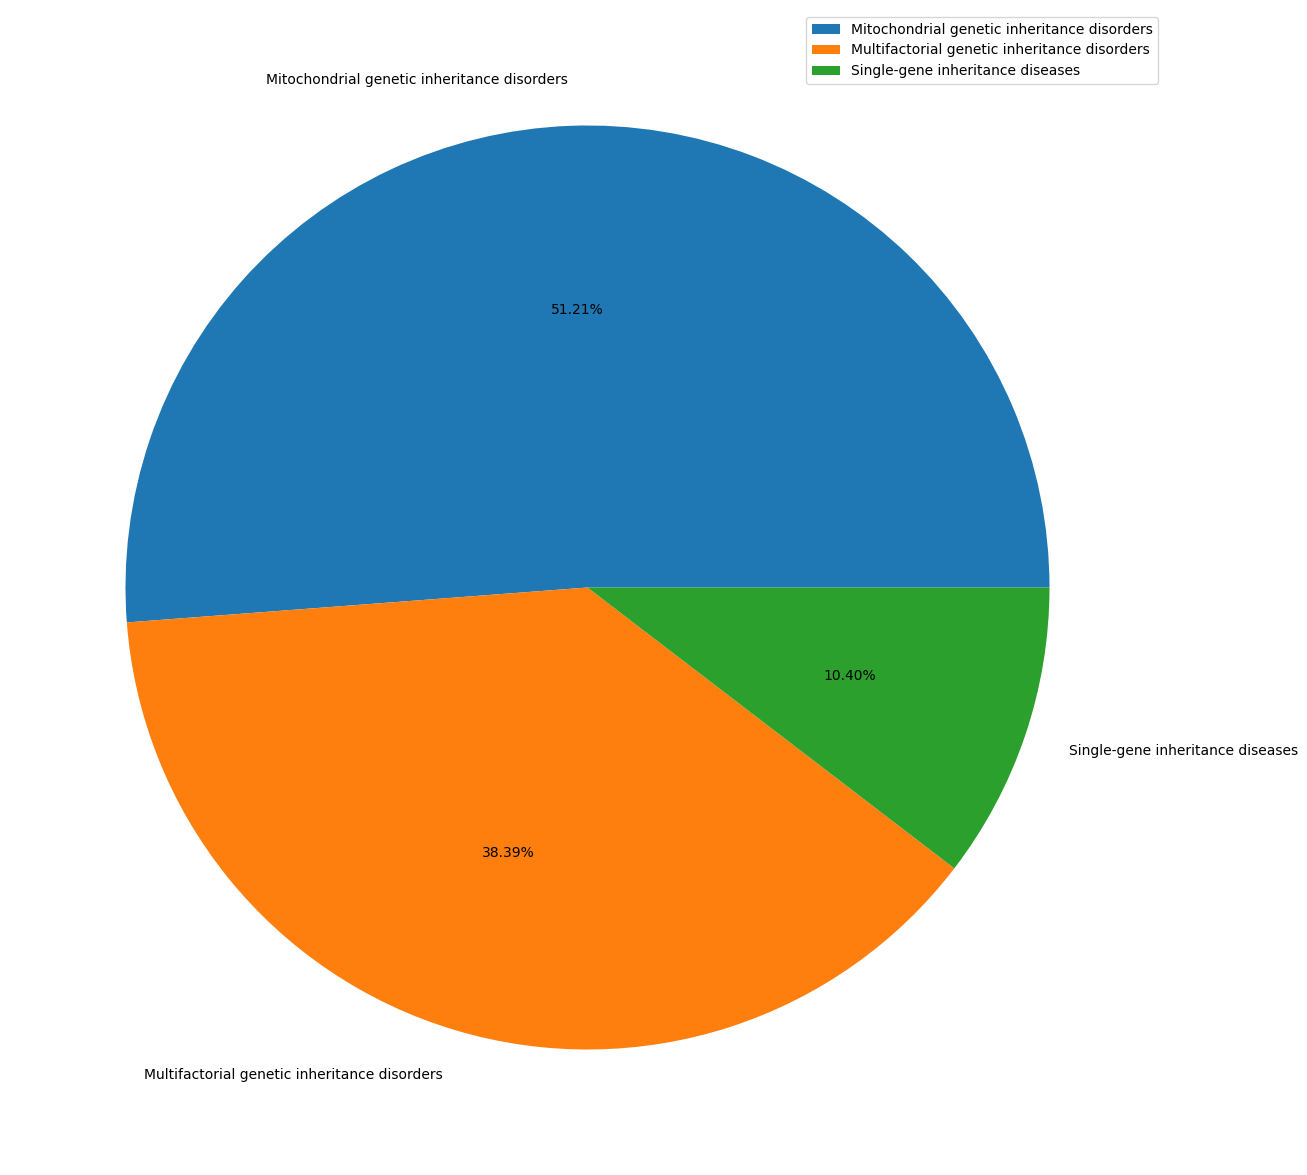

In [ ]:
GD_labels = df['Genetic_Disorder'].unique()
GD_values = df['Genetic_Disorder'].value_counts()
plt.figure(figsize=(15,15))
#df['Genetic_Disorder'].value_counts().plot(kind='pie')
plt.pie(GD_values, labels=GD_labels, autopct='%1.2f%%')
plt.legend(loc = 'upper right')

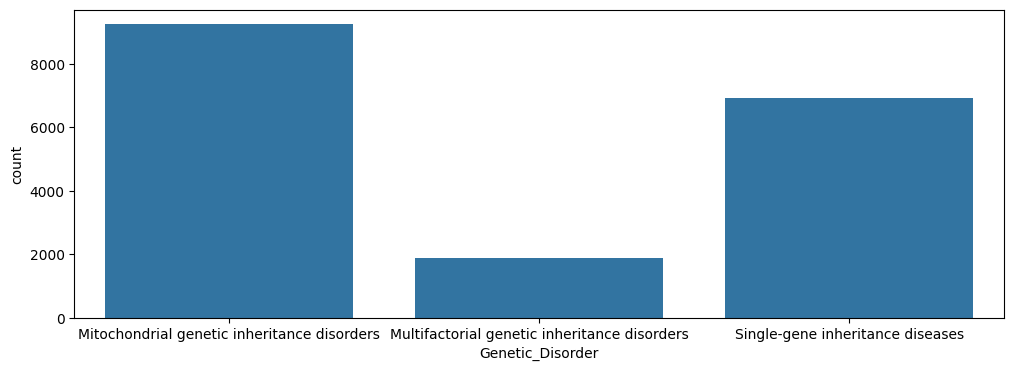

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = df);

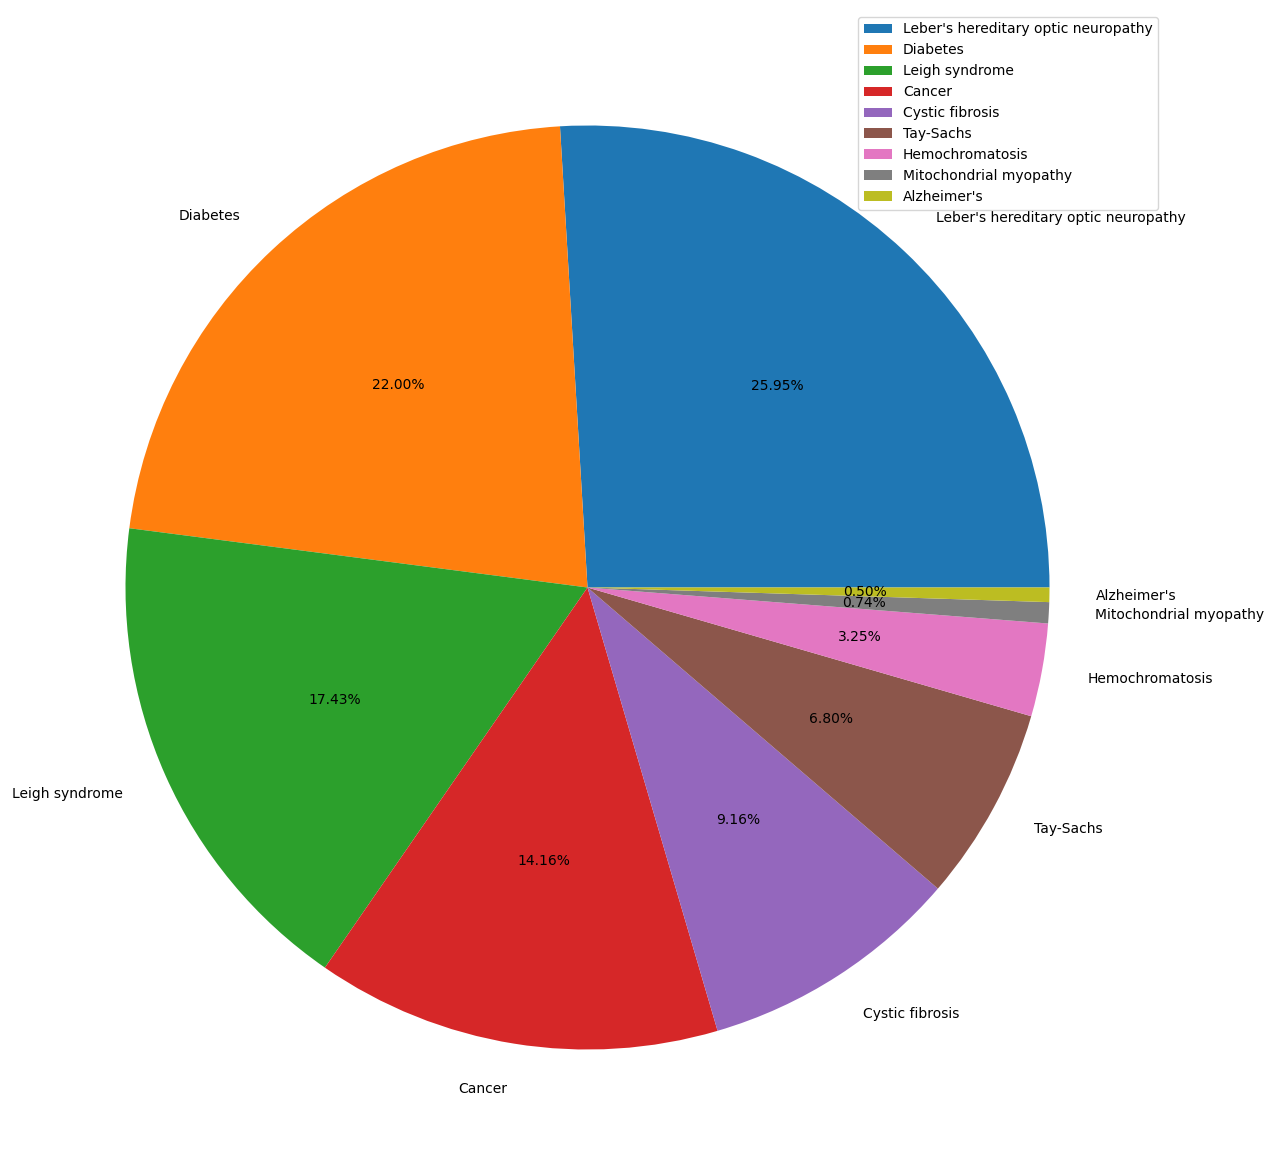

In [ ]:
#plt.figure(figsize=(15,15))
#df['Disorder_Subclass'].value_counts().plot(kind='pie')
#plt.legend(loc = 'upper right')

DS_labels = df['Disorder_Subclass'].unique()
DS_values = df['Disorder_Subclass'].value_counts()
plt.figure(figsize=(15,15))
plt.pie(DS_values, labels=DS_labels, autopct='%1.2f%%')
plt.legend(loc = 'upper right')

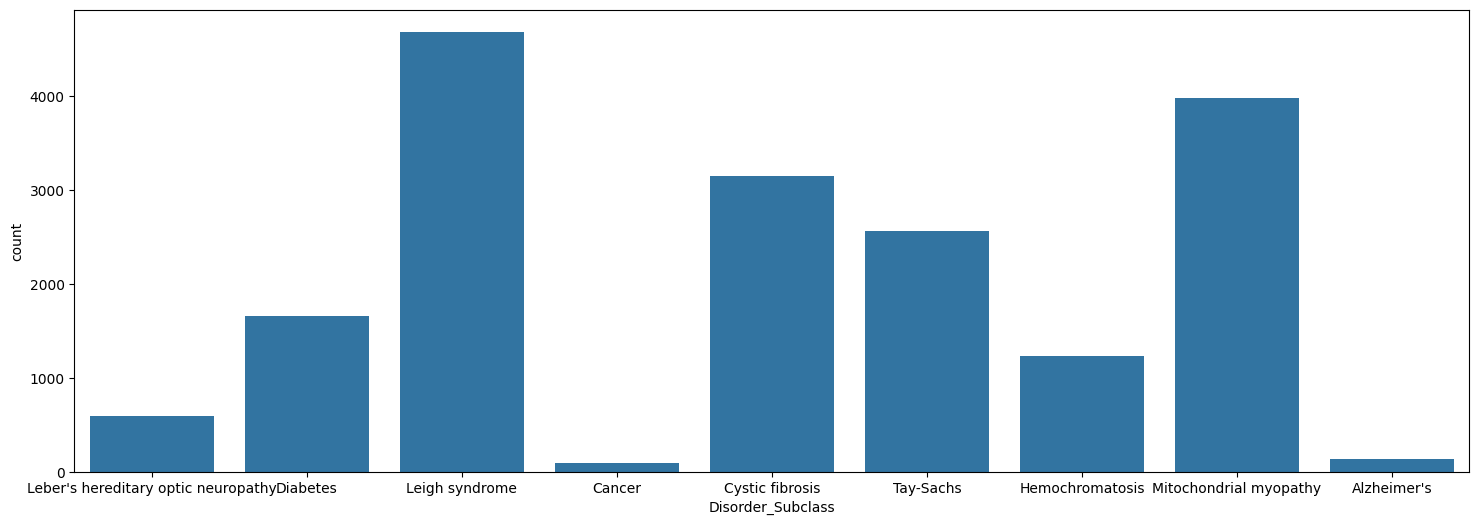

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = df);

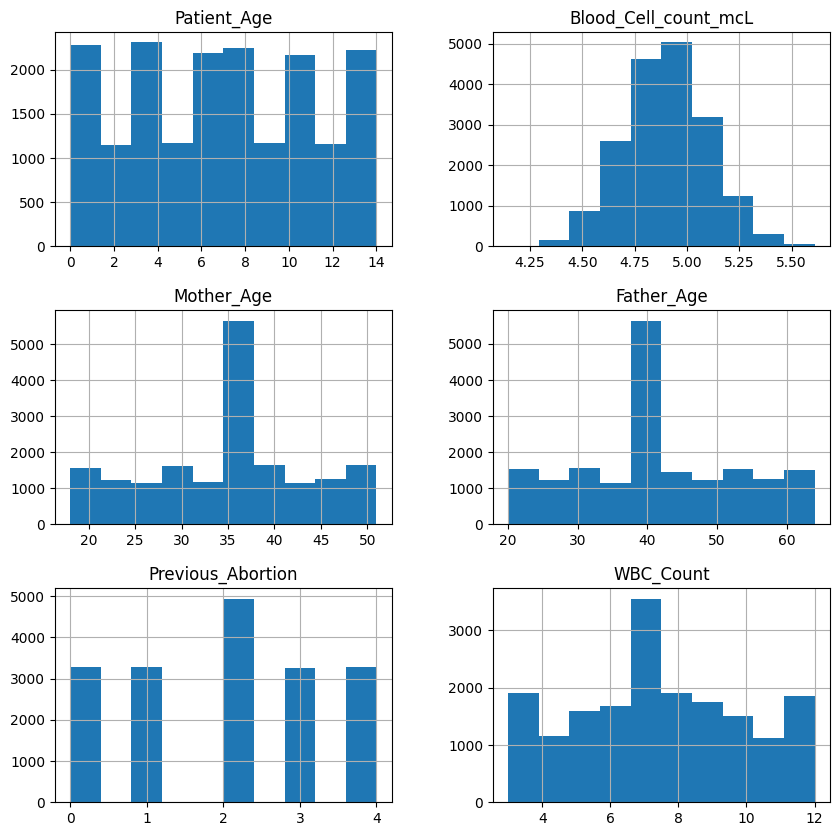

In [ ]:
#histograms for each variable in df
hist = df.hist(bins=10,figsize =(10,10))

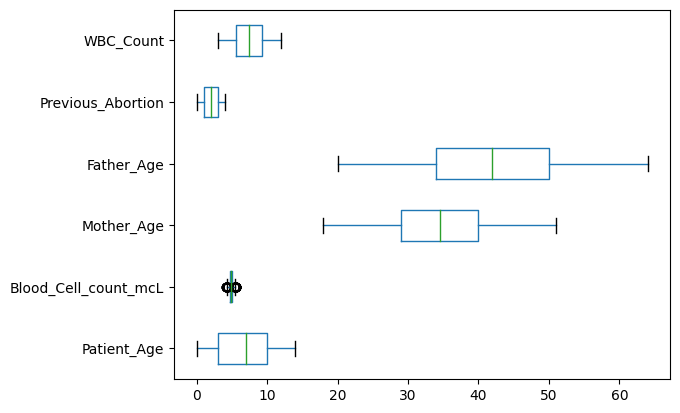

In [ ]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=10)

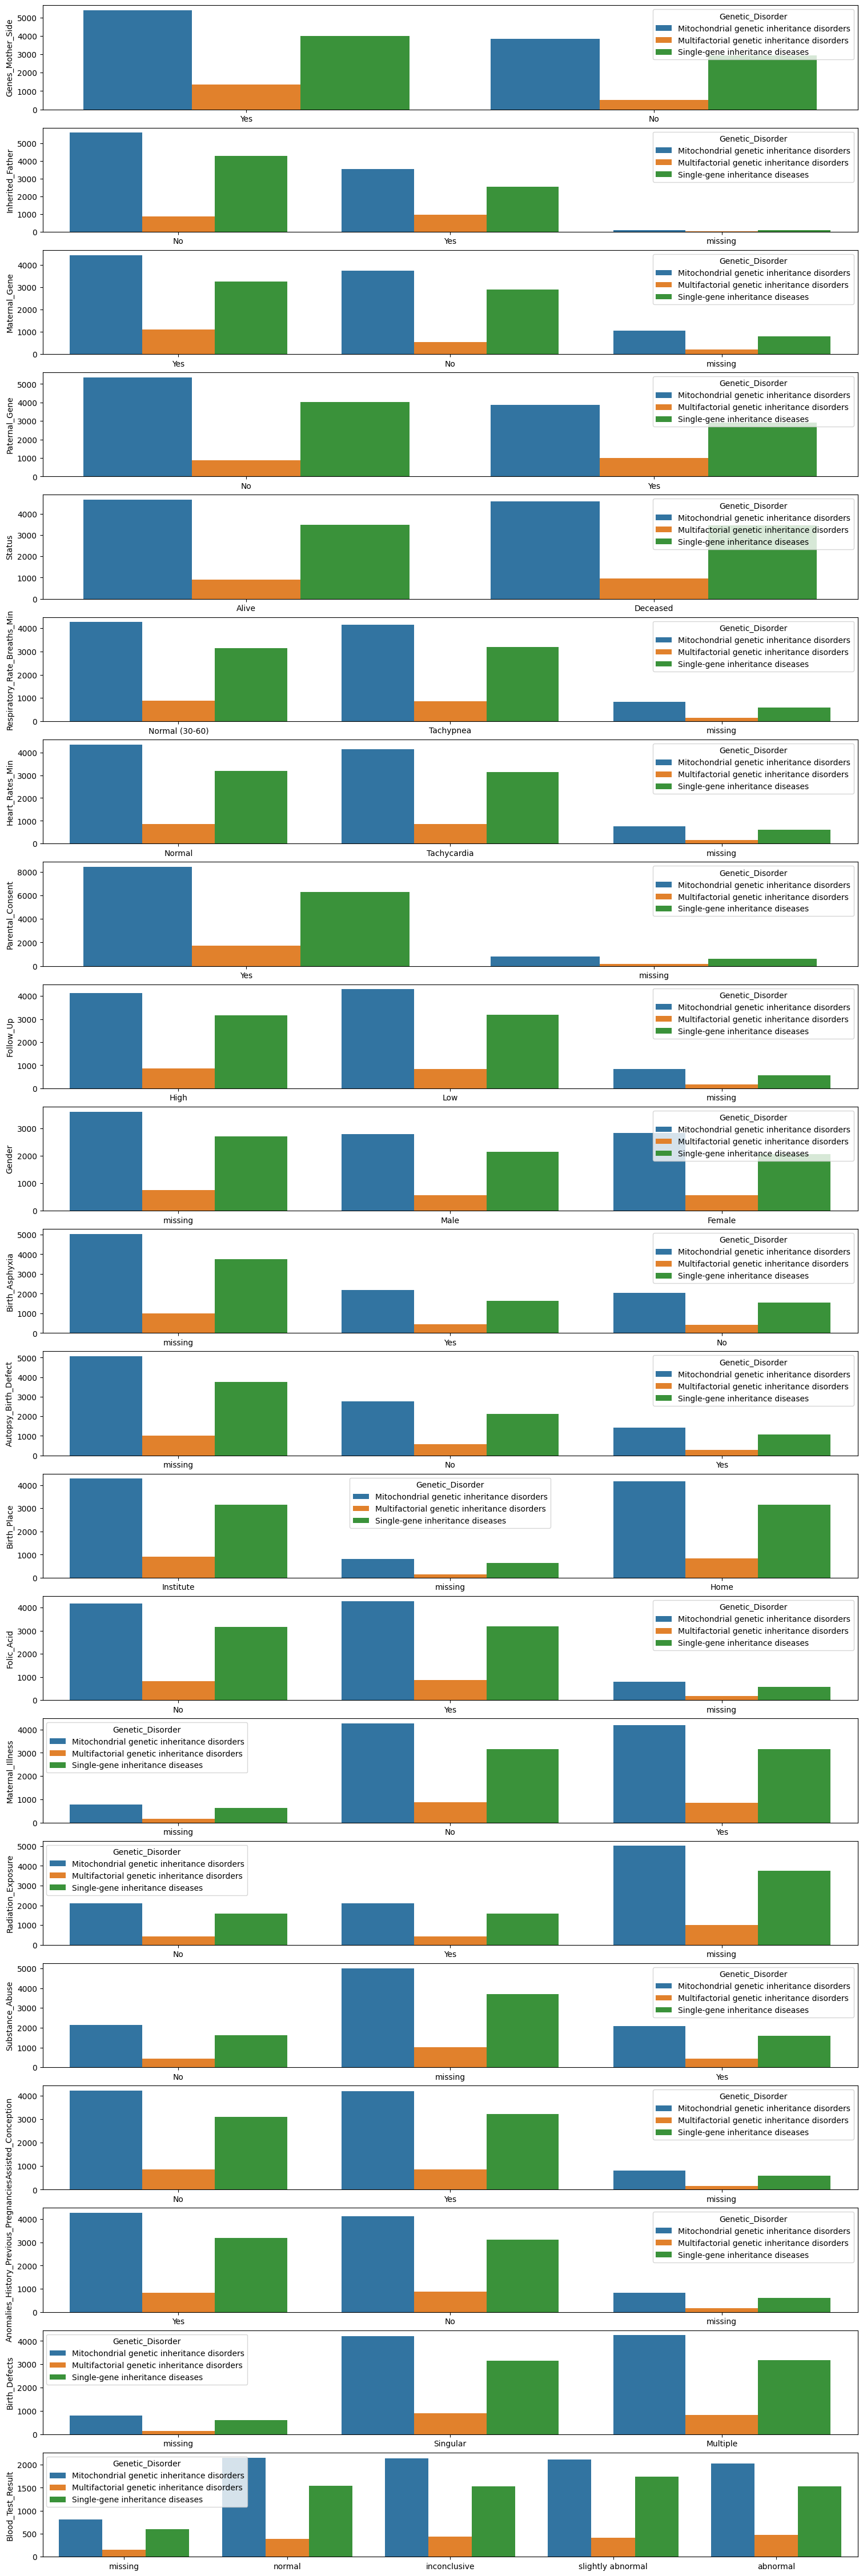

In [ ]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cat_cols):
    sns.countplot(data = df, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

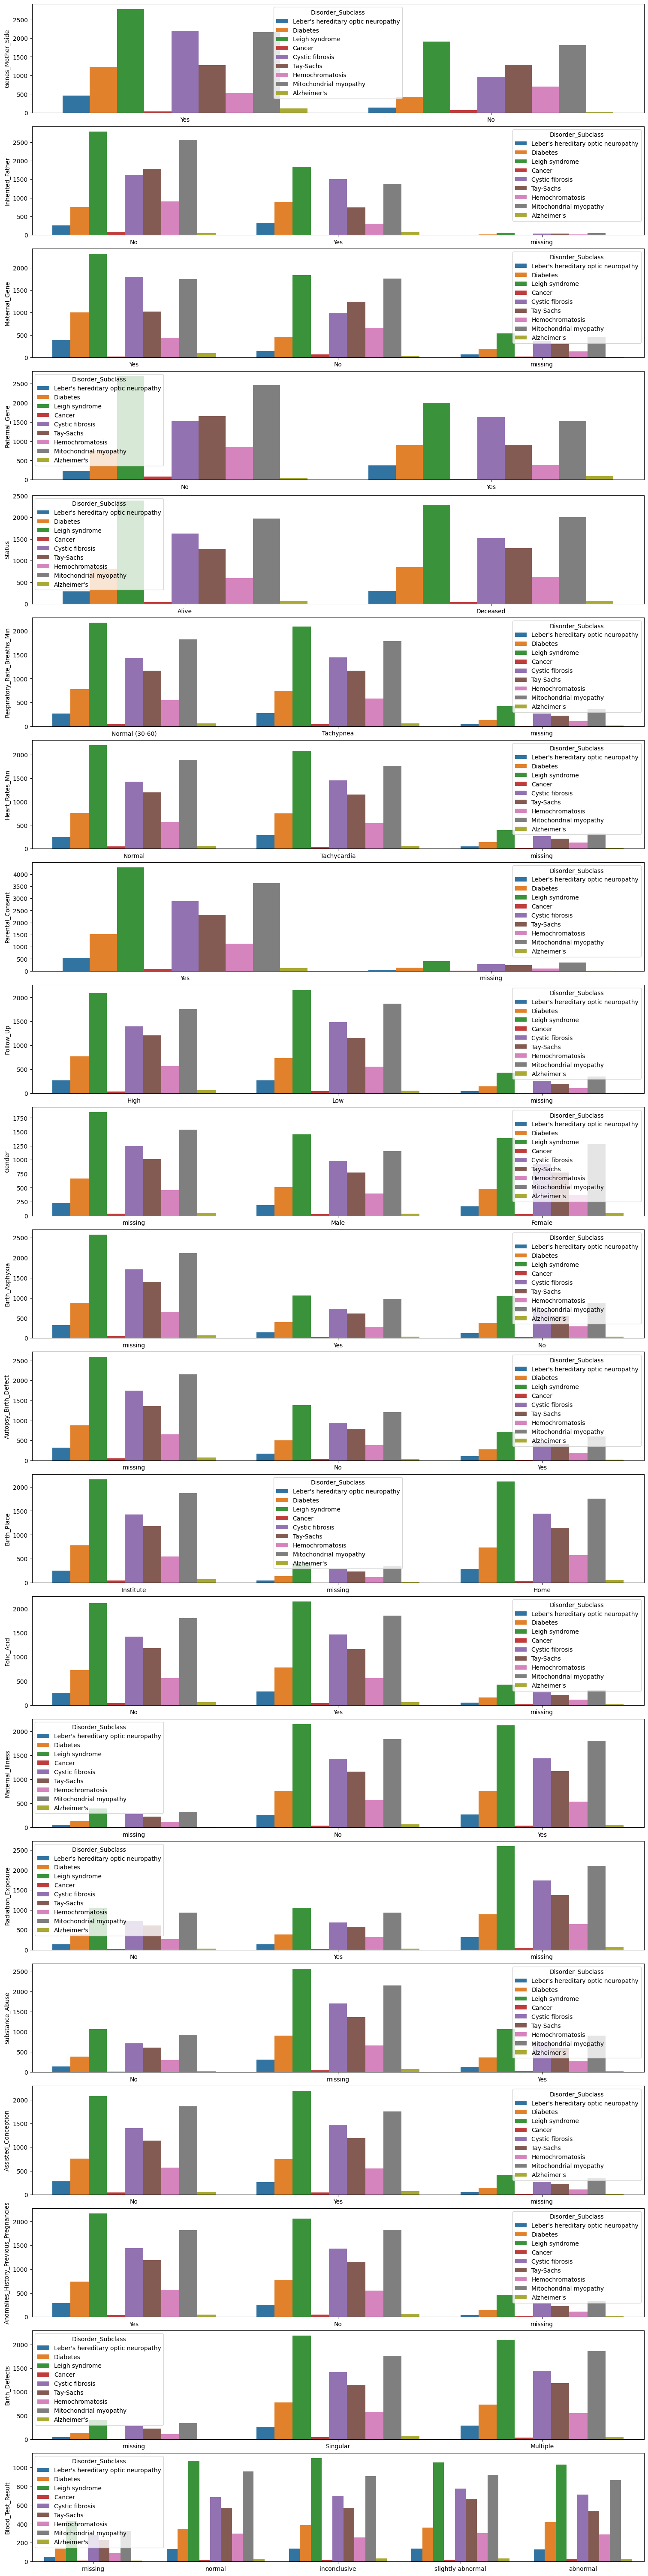

In [ ]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 60), constrained_layout = True)

for i, var in enumerate(cat_cols):
    sns.countplot(data = df, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

<Axes: xlabel='Genetic_Disorder', ylabel='Patient_Age'>

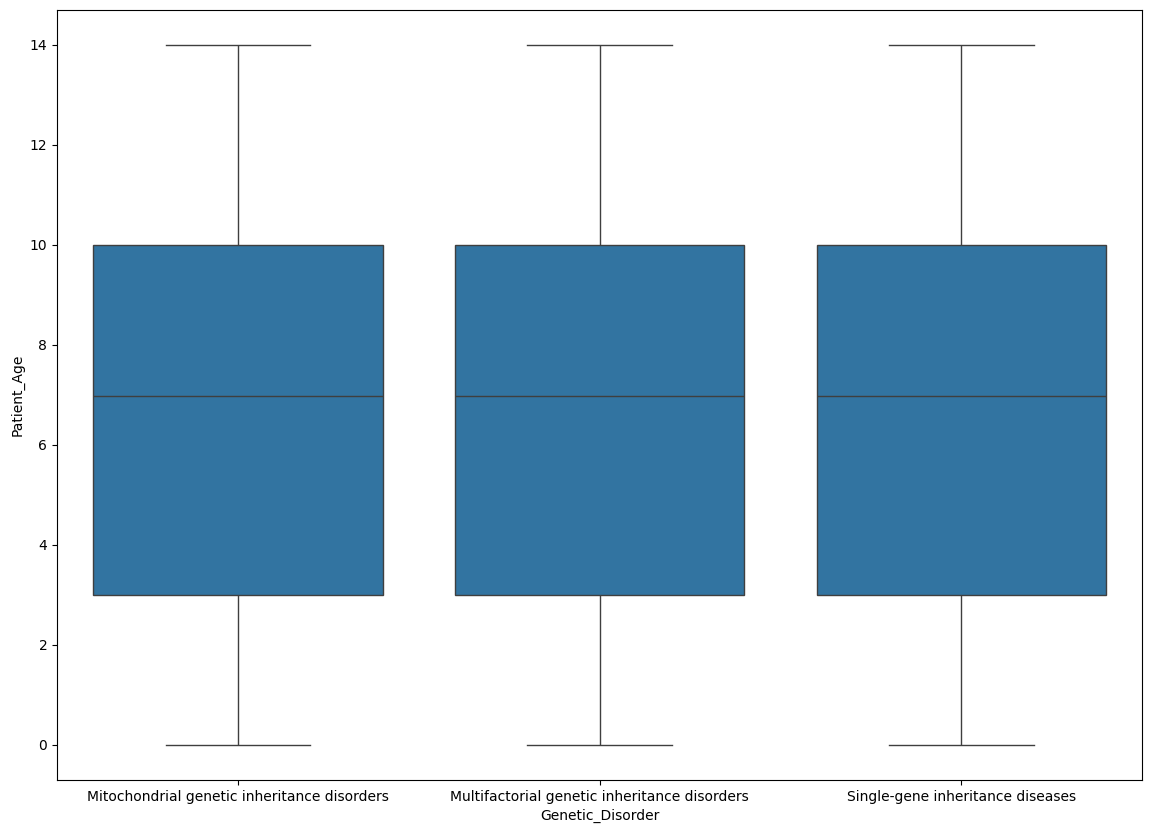

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Genetic_Disorder', y='Patient_Age', data=df)

seaborn to create a categorical plot (catplot) with the x-axis representing the "Genetic_Disorder" column, the y-axis representing the "Blood_Cell_count_mcL" column, and the data coming from the DataFrame df. The height and aspect parameters are used to control the size and aspect ratio of the plot.

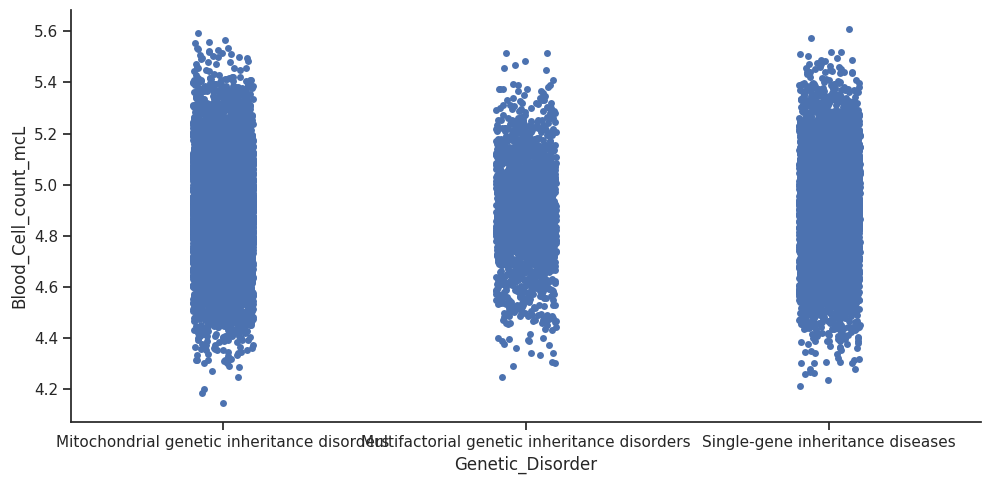

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Genetic_Disorder", y="Blood_Cell_count_mcL",  data=df, height=5, aspect=2)

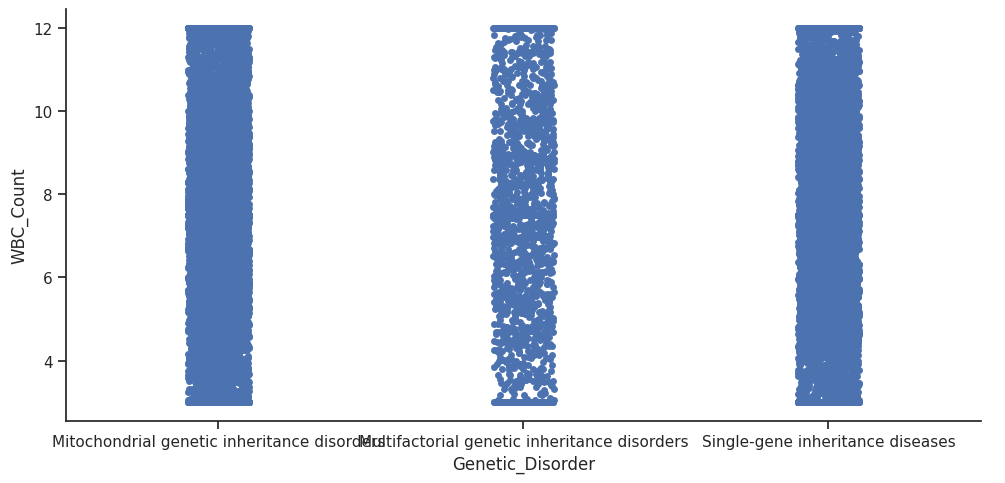

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Genetic_Disorder", y="WBC_Count",  data=df, height=5, aspect=2)

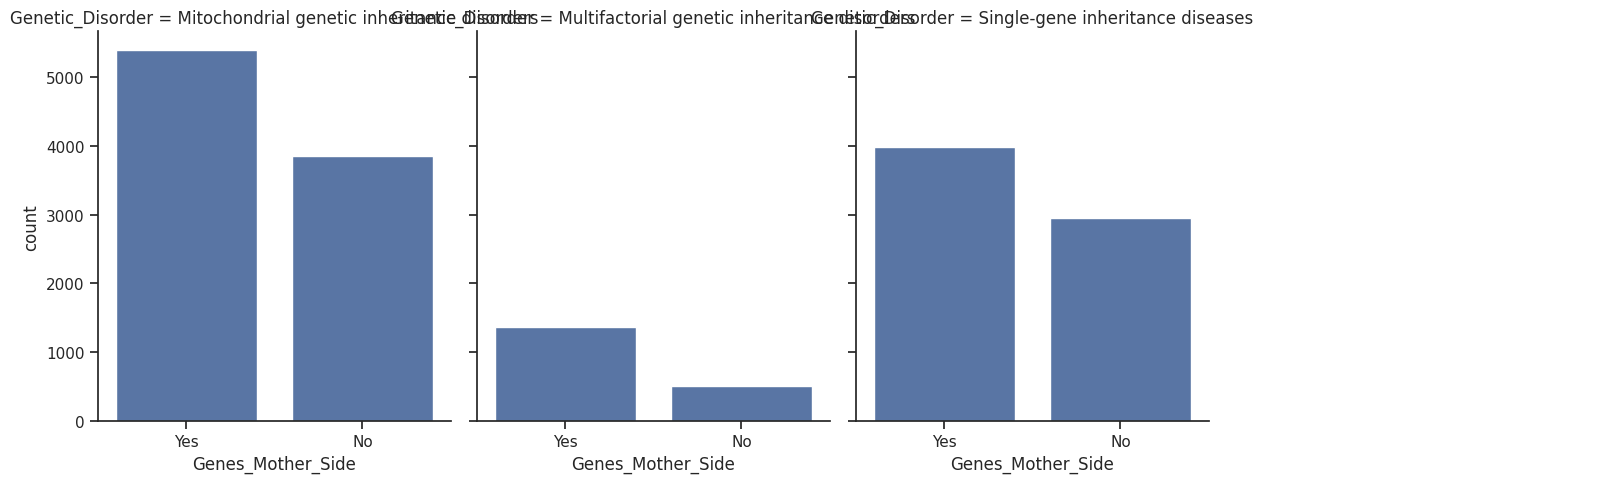

In [ ]:
#count plot for one variable
#print(df.columns)
#sns.countplot(data = df, x = df_cat['Genes_Mother_Side'])

sns.catplot(x="Genes_Mother_Side", col="Genetic_Disorder", col_wrap=4,
                data=df,
                kind="count", height=5, aspect=.8)

In [ ]:
df.head()

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  \
0          2.0               Yes               No           Yes            No   
2          6.0               Yes               No            No            No   
3         12.0               Yes               No           Yes            No   
4         11.0               Yes               No       missing           Yes   
5         14.0               Yes               No           Yes            No   

   Blood_Cell_count_mcL  Mother_Age  Father_Age    Status  \
0              4.760603       34.53       41.97     Alive   
2              4.893297       41.00       22.00     Alive   
3              4.705280       21.00       41.97  Deceased   
4              4.720703       32.00       41.97     Alive   
5              5.103188       34.53       41.97  Deceased   

  Respiratory_Rate_Breaths_Min  ... Radiation_Exposure Substance_Abuse  \
0               Normal (30-60)  ...                 No              No   
2               Normal (30-60)  ...                Yes         missing   
3                    Tachypnea  ...            missing         missing   
4                    Tachypnea  ...            missing         missing   
5                      missing  ...                 No              No   

  Assisted_Conception Anomalies_History_Previous_Pregnancies  \
0                  No                                    Yes   
2                 Yes                                    Yes   
3             missing                                    Yes   
4                 Yes                                     No   
5             missing                                     No   

  Previous_Abortion Birth_Defects  WBC_Count Blood_Test_Result  \
0               2.0       missing   9.857562           missing   
2               4.0      Singular   7.490000            normal   
3               1.0      Singular   7.919321      inconclusive   
4               4.0      Multiple   4.098210           missing   
5               0.0      Multiple  10.272230            normal   

                               Genetic_Disorder  \
0   Mitochondrial genetic inheritance disorders   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   
5              Single-gene inheritance diseases   

                     Disorder_Subclass  
0  Leber's hereditary optic neuropathy  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  
5                      Cystic fibrosis  

[5 rows x 29 columns]

<Figure size 1500x800 with 0 Axes>

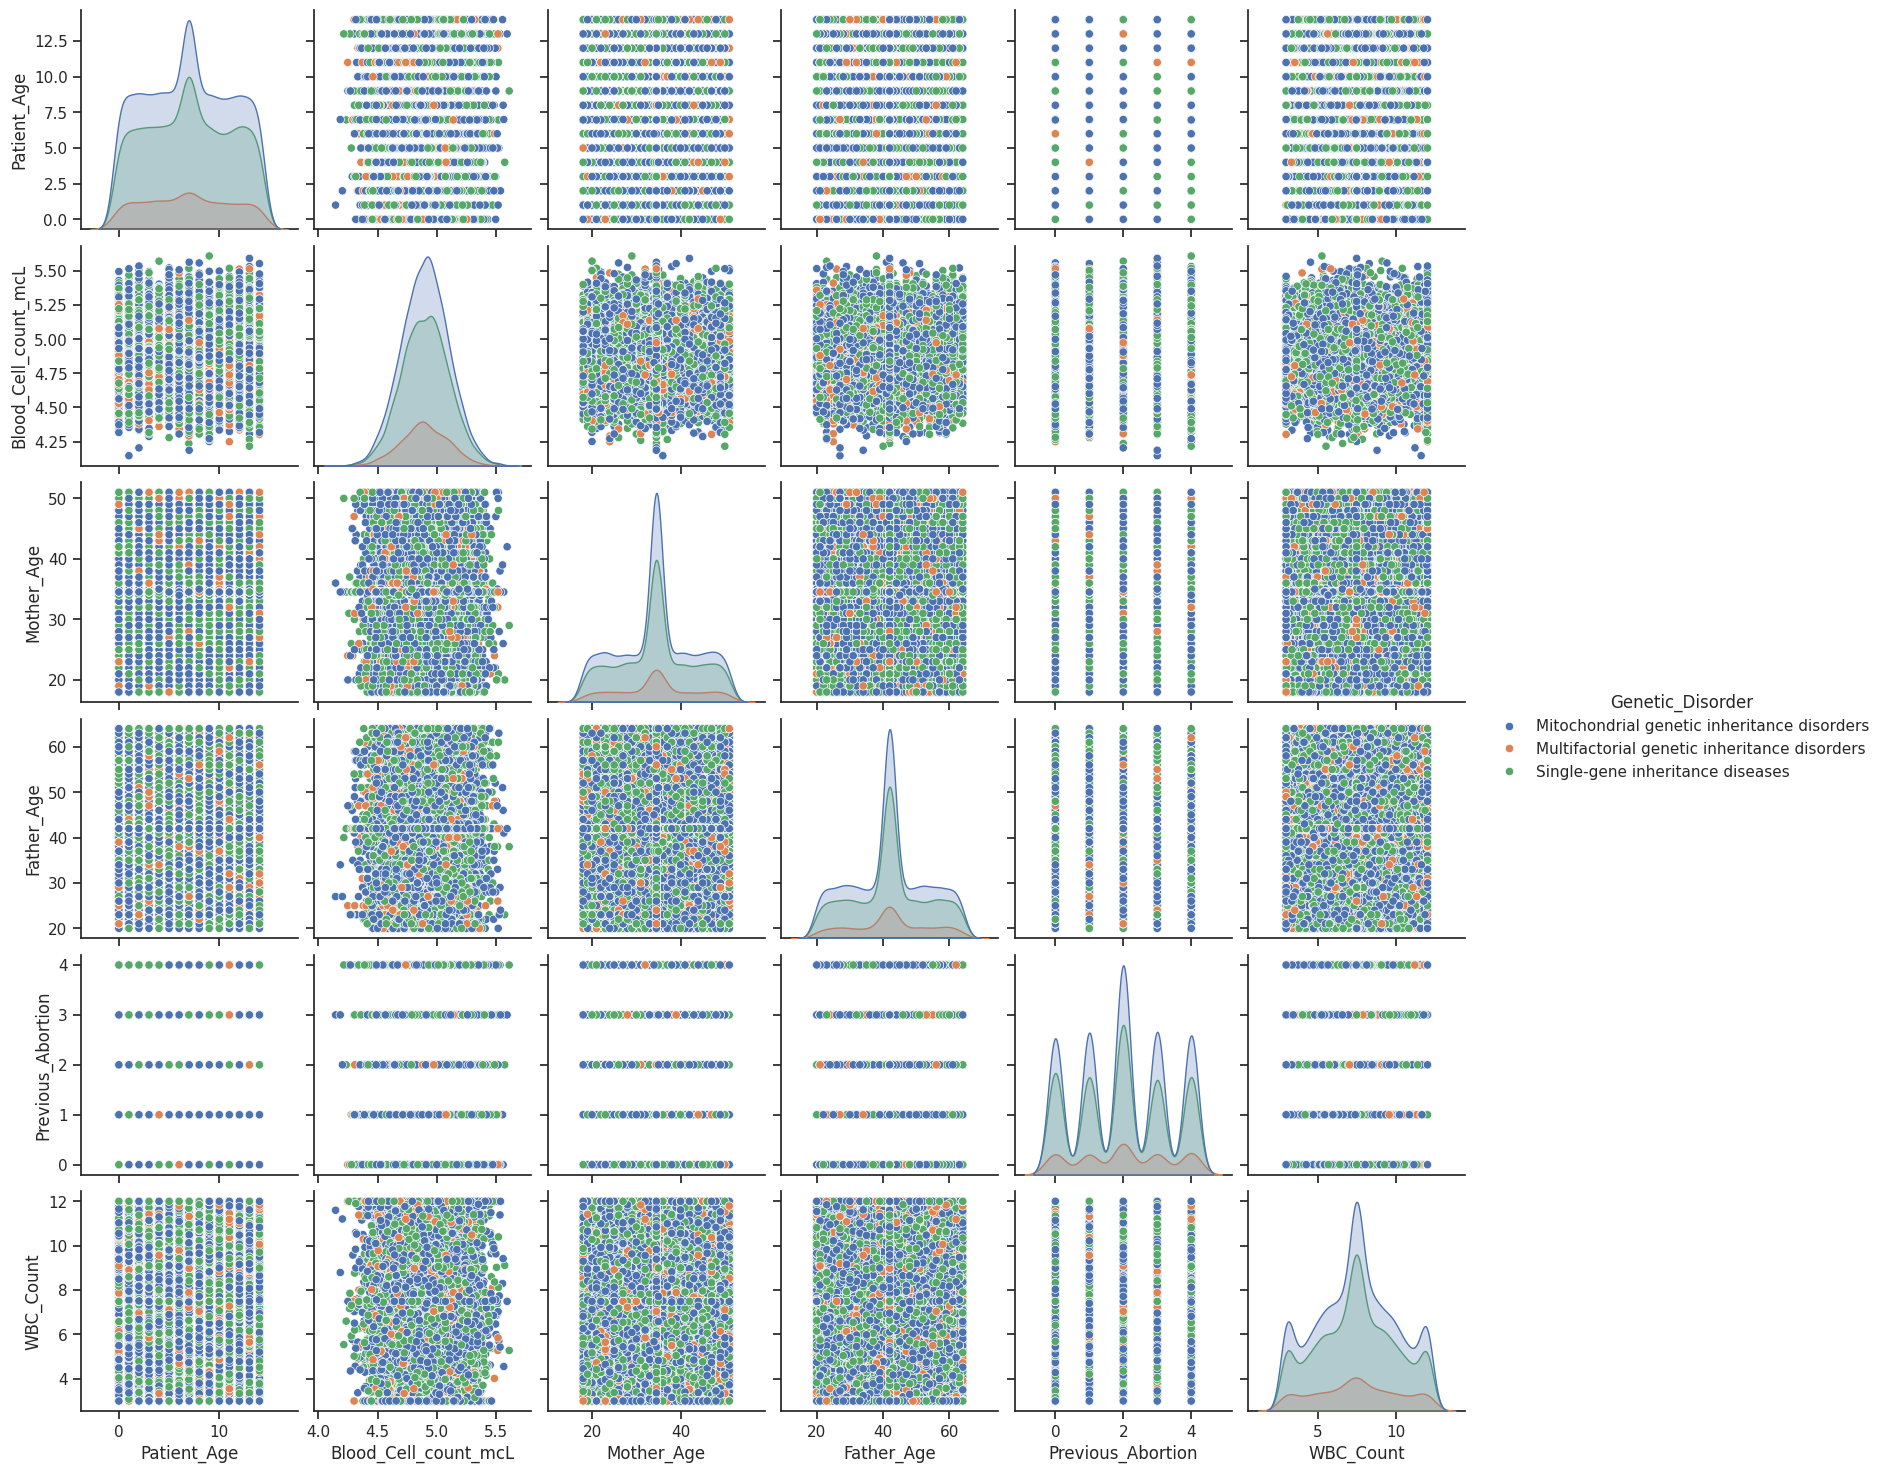

In [ ]:
figure = plt.figure(figsize=(15,8))
sns.pairplot(df,hue="Genetic_Disorder")
plt.show()

In [ ]:
df.isna().sum()

Patient_Age                               0
Genes_Mother_Side                         0
Inherited_Father                          0
Maternal_Gene                             0
Paternal_Gene                             0
Blood_Cell_count_mcL                      0
Mother_Age                                0
Father_Age                                0
Status                                    0
Respiratory_Rate_Breaths_Min              0
Heart_Rates_Min                           0
Parental_Consent                          0
Follow_Up                                 0
Gender                                    0
Birth_Asphyxia                            0
Autopsy_Birth_Defect                      0
Birth_Place                               0
Folic_Acid                                0
Maternal_Illness                          0
Radiation_Exposure                        0
Substance_Abuse                           0
Assisted_Conception                       0
Anomalies_History_Previous_Pregn

In [ ]:
df.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_count_mcL', 'Mother_Age', 'Father_Age',
       'Status', 'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'Anomalies_History_Previous_Pregnancies', 'Previous_Abortion',
       'Birth_Defects', 'WBC_Count', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [ ]:
from pathlib import Path
filepath = Path('/content/sample_data/train_clean.csv')
df.to_csv(filepath, index=False)

Step 3 : FEATURE SELECTION

In [ ]:
from pathlib import Path
filepath = Path('/content/sample_data/train_clean.csv')
clean_data = pd.read_csv(filepath)
clean_data.head()

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  \
0          2.0               Yes               No           Yes            No   
1          6.0               Yes               No            No            No   
2         12.0               Yes               No           Yes            No   
3         11.0               Yes               No       missing           Yes   
4         14.0               Yes               No           Yes            No   

   Blood_Cell_count_mcL  Mother_Age  Father_Age    Status  \
0              4.760603       34.53       41.97     Alive   
1              4.893297       41.00       22.00     Alive   
2              4.705280       21.00       41.97  Deceased   
3              4.720703       32.00       41.97     Alive   
4              5.103188       34.53       41.97  Deceased   

  Respiratory_Rate_Breaths_Min  ... Radiation_Exposure Substance_Abuse  \
0               Normal (30-60)  ...                 No              No   
1               Normal (30-60)  ...                Yes         missing   
2                    Tachypnea  ...            missing         missing   
3                    Tachypnea  ...            missing         missing   
4                      missing  ...                 No              No   

  Assisted_Conception Anomalies_History_Previous_Pregnancies  \
0                  No                                    Yes   
1                 Yes                                    Yes   
2             missing                                    Yes   
3                 Yes                                     No   
4             missing                                     No   

  Previous_Abortion Birth_Defects  WBC_Count Blood_Test_Result  \
0               2.0       missing   9.857562           missing   
1               4.0      Singular   7.490000            normal   
2               1.0      Singular   7.919321      inconclusive   
3               4.0      Multiple   4.098210           missing   
4               0.0      Multiple  10.272230            normal   

                               Genetic_Disorder  \
0   Mitochondrial genetic inheritance disorders   
1  Multifactorial genetic inheritance disorders   
2   Mitochondrial genetic inheritance disorders   
3  Multifactorial genetic inheritance disorders   
4              Single-gene inheritance diseases   

                     Disorder_Subclass  
0  Leber's hereditary optic neuropathy  
1                             Diabetes  
2                       Leigh syndrome  
3                               Cancer  
4                      Cystic fibrosis  

[5 rows x 29 columns]

In [ ]:
clean_data.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_count_mcL', 'Mother_Age', 'Father_Age',
       'Status', 'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'Anomalies_History_Previous_Pregnancies', 'Previous_Abortion',
       'Birth_Defects', 'WBC_Count', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [ ]:
GD_data = clean_data.drop(columns=[ 'Disorder_Subclass'], axis=1)

In [ ]:
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Mitochondrial genetic inheritance disorders', value='Mitochondrial')
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Single-gene inheritance diseases', value='Single_gene')
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Multifactorial genetic inheritance disorders', value='Multifactorial')
#GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].astype(int)

# check the diff between Mitochondrial and Multifactorial

In [ ]:
GD_data.head()

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  \
0          2.0               Yes               No           Yes            No   
1          6.0               Yes               No            No            No   
2         12.0               Yes               No           Yes            No   
3         11.0               Yes               No       missing           Yes   
4         14.0               Yes               No           Yes            No   

   Blood_Cell_count_mcL  Mother_Age  Father_Age    Status  \
0              4.760603       34.53       41.97     Alive   
1              4.893297       41.00       22.00     Alive   
2              4.705280       21.00       41.97  Deceased   
3              4.720703       32.00       41.97     Alive   
4              5.103188       34.53       41.97  Deceased   

  Respiratory_Rate_Breaths_Min  ... Maternal_Illness Radiation_Exposure  \
0               Normal (30-60)  ...          missing                 No   
1               Normal (30-60)  ...               No                Yes   
2                    Tachypnea  ...              Yes            missing   
3                    Tachypnea  ...              Yes            missing   
4                      missing  ...               No                 No   

  Substance_Abuse Assisted_Conception Anomalies_History_Previous_Pregnancies  \
0              No                  No                                    Yes   
1         missing                 Yes                                    Yes   
2         missing             missing                                    Yes   
3         missing                 Yes                                     No   
4              No             missing                                     No   

  Previous_Abortion Birth_Defects  WBC_Count Blood_Test_Result  \
0               2.0       missing   9.857562           missing   
1               4.0      Singular   7.490000            normal   
2               1.0      Singular   7.919321      inconclusive   
3               4.0      Multiple   4.098210           missing   
4               0.0      Multiple  10.272230            normal   

  Genetic_Disorder  
0    Mitochondrial  
1   Multifactorial  
2    Mitochondrial  
3   Multifactorial  
4      Single_gene  

[5 rows x 28 columns]

In [ ]:
X = GD_data.drop('Genetic_Disorder', axis=1)
cat_cols = X.select_dtypes(include='object').columns.values
X=pd.get_dummies(X, columns= cat_cols, prefix =cat_cols)
y=GD_data['Genetic_Disorder']

In [ ]:
X.columns

Index(['Patient_Age', 'Blood_Cell_count_mcL', 'Mother_Age', 'Father_Age',
       'Previous_Abortion', 'WBC_Count', 'Genes_Mother_Side_No',
       'Genes_Mother_Side_Yes', 'Inherited_Father_No', 'Inherited_Father_Yes',
       'Inherited_Father_missing', 'Maternal_Gene_No', 'Maternal_Gene_Yes',
       'Maternal_Gene_missing', 'Paternal_Gene_No', 'Paternal_Gene_Yes',
       'Status_Alive', 'Status_Deceased',
       'Respiratory_Rate_Breaths_Min_Normal (30-60)',
       'Respiratory_Rate_Breaths_Min_Tachypnea',
       'Respiratory_Rate_Breaths_Min_missing', 'Heart_Rates_Min_Normal',
       'Heart_Rates_Min_Tachycardia', 'Heart_Rates_Min_missing',
       'Parental_Consent_Yes', 'Parental_Consent_missing', 'Follow_Up_High',
       'Follow_Up_Low', 'Follow_Up_missing', 'Gender_Female', 'Gender_Male',
       'Gender_missing', 'Birth_Asphyxia_No', 'Birth_Asphyxia_Yes',
       'Birth_Asphyxia_missing', 'Autopsy_Birth_Defect_No',
       'Autopsy_Birth_Defect_Yes', 'Autopsy_Birth_Defect_missing',
 

In [ ]:
X.corr()

Patient_Age  Blood_Cell_count_mcL  \
Patient_Age                             1.000000              0.009777   
Blood_Cell_count_mcL                    0.009777              1.000000   
Mother_Age                             -0.006142             -0.004398   
Father_Age                             -0.008091              0.003601   
Previous_Abortion                      -0.007037             -0.007439   
...                                          ...                   ...   
Blood_Test_Result_abnormal              0.001141             -0.011116   
Blood_Test_Result_inconclusive         -0.003676              0.014500   
Blood_Test_Result_missing              -0.009181             -0.007020   
Blood_Test_Result_normal               -0.010994             -0.003139   
Blood_Test_Result_slightly abnormal     0.019439              0.004328   

                                     Mother_Age  Father_Age  \
Patient_Age                           -0.006142   -0.008091   
Blood_Cell_count_mcL                  -0.004398    0.003601   
Mother_Age                             1.000000    0.001281   
Father_Age                             0.001281    1.000000   
Previous_Abortion                      0.010025    0.000556   
...                                         ...         ...   
Blood_Test_Result_abnormal            -0.010839   -0.000734   
Blood_Test_Result_inconclusive         0.007914    0.005142   
Blood_Test_Result_missing             -0.002212    0.000752   
Blood_Test_Result_normal               0.003189    0.002767   
Blood_Test_Result_slightly abnormal    0.001133   -0.007586   

                                     Previous_Abortion  WBC_Count  \
Patient_Age                                  -0.007037  -0.008292   
Blood_Cell_count_mcL                         -0.007439   0.002473   
Mother_Age                                    0.010025   0.015616   
Father_Age                                    0.000556   0.014544   
Previous_Abortion                             1.000000   0.003825   
...                                                ...        ...   
Blood_Test_Result_abnormal                   -0.003258  -0.007759   
Blood_Test_Result_inconclusive               -0.001564   0.006537   
Blood_Test_Result_missing                    -0.003247   0.005028   
Blood_Test_Result_normal                      0.001182  -0.001897   
Blood_Test_Result_slightly abnormal           0.005726  -0.000310   

                                     Genes_Mother_Side_No  \
Patient_Age                                     -0.001930   
Blood_Cell_count_mcL                            -0.001026   
Mother_Age                                      -0.009674   
Father_Age                                       0.009144   
Previous_Abortion                               -0.002627   
...                                                   ...   
Blood_Test_Result_abnormal                      -0.006889   
Blood_Test_Result_inconclusive                   0.009154   
Blood_Test_Result_missing                       -0.000395   
Blood_Test_Result_normal                         0.005739   
Blood_Test_Result_slightly abnormal             -0.007684   

                                     Genes_Mother_Side_Yes  \
Patient_Age                                       0.001930   
Blood_Cell_count_mcL                              0.001026   
Mother_Age                                        0.009674   
Father_Age                                       -0.009144   
Previous_Abortion                                 0.002627   
...                                                    ...   
Blood_Test_Result_abnormal                        0.006889   
Blood_Test_Result_inconclusive                   -0.009154   
Blood_Test_Result_missing                         0.000395   
Blood_Test_Result_normal                         -0.005739   
Blood_Test_Result_slightly abnormal               0.007684   

                                     Inherited_Father_No  \
Patient_Age             

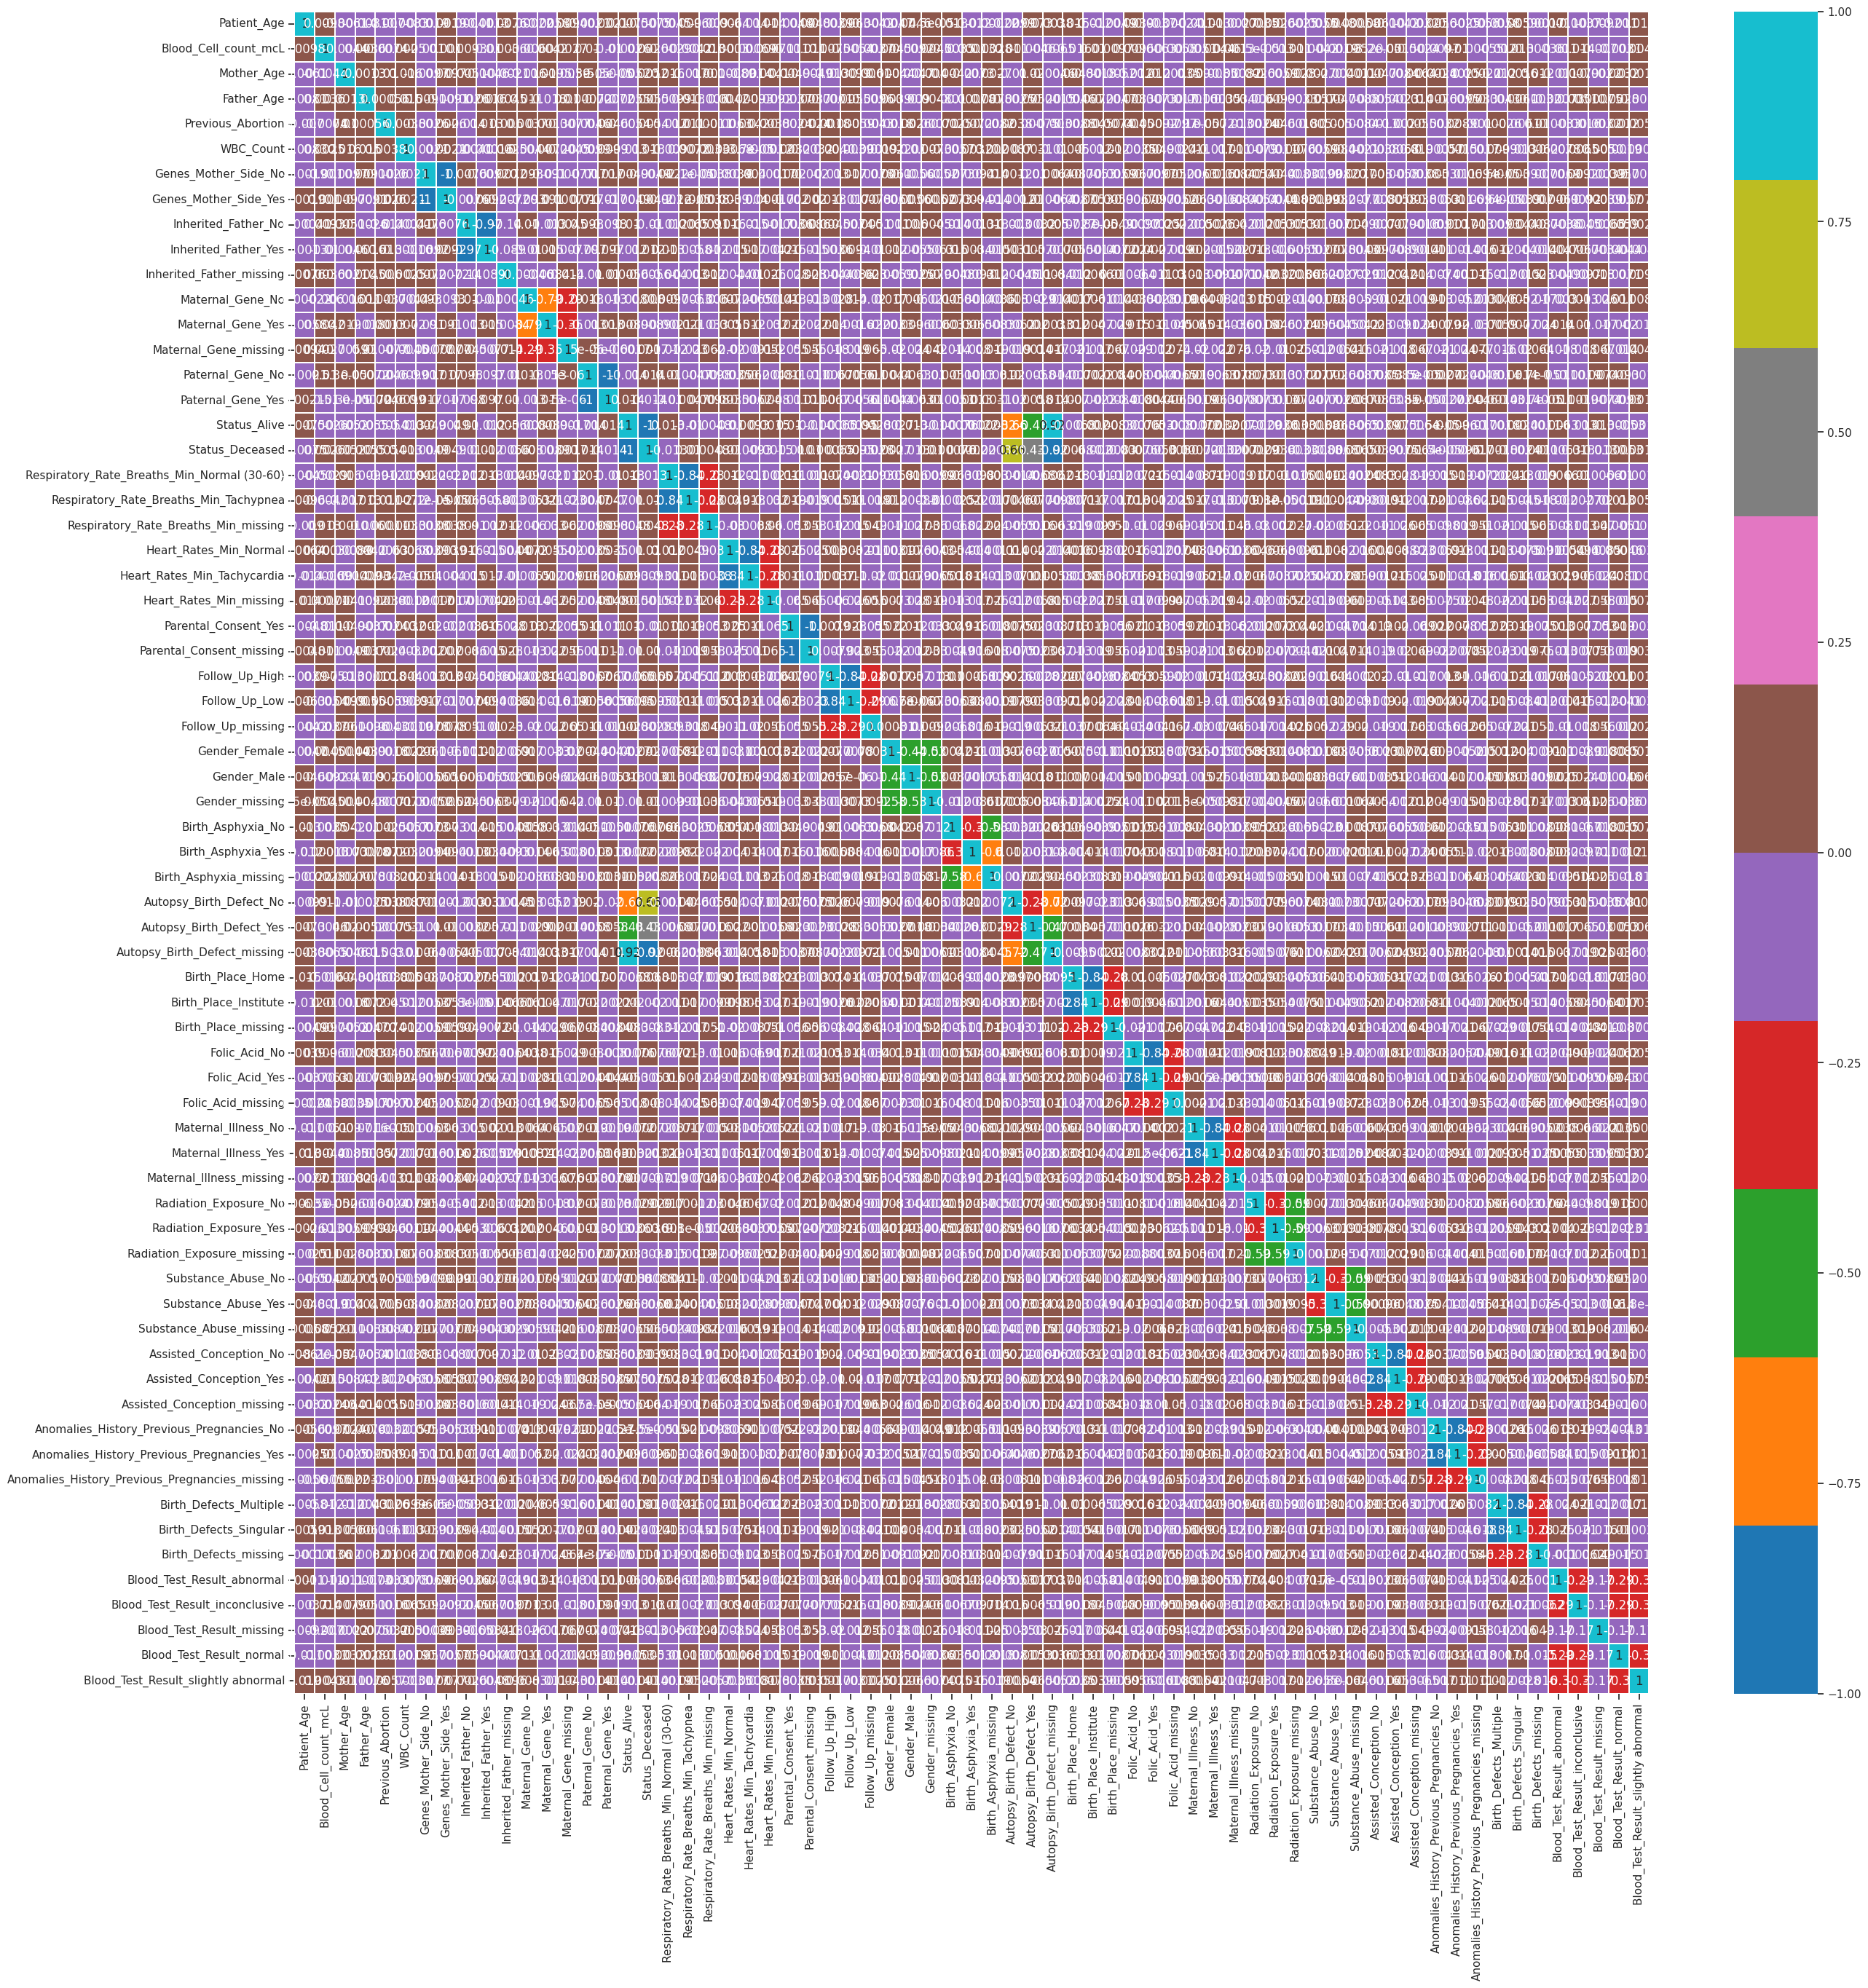

In [ ]:
### create the correlation matrix heat map
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(),linewidths=.1,cmap="tab10", annot=True)
plt.yticks(rotation=0);

In [ ]:
X.describe()

Patient_Age  Blood_Cell_count_mcL    Mother_Age    Father_Age  \
count  18047.000000          18047.000000  18047.000000  18047.000000   
mean       6.950030              4.899198     34.564981     41.971932   
std        4.185769              0.199061      8.524106     11.353151   
min        0.000000              4.146230     18.000000     20.000000   
25%        3.000000              4.764199     29.000000     34.000000   
50%        6.970000              4.900306     34.530000     41.970000   
75%       10.000000              5.033654     40.000000     50.000000   
max       14.000000              5.609829     51.000000     64.000000   

       Previous_Abortion     WBC_Count  Genes_Mother_Side_No  \
count       18047.000000  18047.000000          18047.000000   
mean            1.999501      7.477010              0.404721   
std             1.347744      2.530330              0.490852   
min             0.000000      3.000000              0.000000   
25%             1.000000      5.628244              0.000000   
50%             2.000000      7.490000              0.000000   
75%             3.000000      9.286786              1.000000   
max             4.000000     12.000000              1.000000   

       Genes_Mother_Side_Yes  Inherited_Father_No  Inherited_Father_Yes  ...  \
count           18047.000000         18047.000000          18047.000000  ...   
mean                0.595279             0.596941              0.390868  ...   
std                 0.490852             0.490526              0.487958  ...   
min                 0.000000             0.000000              0.000000  ...   
25%                 0.000000             0.000000              0.000000  ...   
50%                 1.000000             1.000000              0.000000  ...   
75%                 1.000000             1.000000              1.000000  ...   
max                 1.000000             1.000000              1.000000  ...   

       Anomalies_History_Previous_Pregnancies_Yes  \
count                                18047.000000   
mean                                     0.459079   
std                                      0.498336   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      1.000000   
max                                      1.000000   

       Anomalies_History_Previous_Pregnancies_missing  Birth_Defects_Multiple  \
count                                    18047.000000            18047.000000   
mean                                         0.089433                0.456696   
std                                          0.285376                0.498135   
min                                          0.000000                0.000000   
25%                                          0.000000                0.000000   
50%                                          0.000000                0.000000   
75%                                          0.000000                1.000000   
max                                          1.000000                1.000000   

       Birth_Defects_Singular  Birth_Defects_missing  \
count            18047.000000           18047.000000   
mean                 0.456586               0.086718   
std                  0.498125               0.281429   
min                  0.000000               0.000000   
25%                  0.000000               0.000000   
50%                  0.000000               0.000000   
75%                  1.000000               0.000000   
max                  1.000000               1.000000   

       Blood_Test_Result_abnormal  Blood_Test_Result_inconclusive  \
count                18047.000000                    18047.000000   
mean                     0.223084                        0.227683   
std                      0.416326                        0.419349   
min                      0.000000                        0.0000

In [ ]:
#X = genetic_data.drop('Genetic_Disorder', axis=1)
X.head()

Patient_Age  Blood_Cell_count_mcL  Mother_Age  Father_Age  \
0          2.0              4.760603       34.53       41.97   
1          6.0              4.893297       41.00       22.00   
2         12.0              4.705280       21.00       41.97   
3         11.0              4.720703       32.00       41.97   
4         14.0              5.103188       34.53       41.97   

   Previous_Abortion  WBC_Count  Genes_Mother_Side_No  Genes_Mother_Side_Yes  \
0                2.0   9.857562                     0                      1   
1                4.0   7.490000                     0                      1   
2                1.0   7.919321                     0                      1   
3                4.0   4.098210                     0                      1   
4                0.0  10.272230                     0                      1   

   Inherited_Father_No  Inherited_Father_Yes  ...  \
0                    1                     0  ...   
1                    1                     0  ...   
2                    1                     0  ...   
3                    1                     0  ...   
4                    1                     0  ...   

   Anomalies_History_Previous_Pregnancies_Yes  \
0                                           1   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   Anomalies_History_Previous_Pregnancies_missing  Birth_Defects_Multiple  \
0                                               0                       0   
1                                               0                       0   
2                                               0                       0   
3                                               0                       1   
4                                               0                       1   

   Birth_Defects_Singular  Birth_Defects_missing  Blood_Test_Result_abnormal  \
0                       0                      1                           0   
1                       1                      0                           0   
2                       1                      0                           0   
3                       0                      0                           0   
4                       0                      0                           0   

   Blood_Test_Result_inconclusive  Blood_Test_Result_missing  \
0                               0                          1   
1                               0                          0   
2                               1                          0   
3                               0                          1   
4                               0                          0   

   Blood_Test_Result_normal  Blood_Test_Result_slightly abnormal  
0                         0                                    0  
1                         1                                    0  
2                         0                                    0  
3                         0                                    0  
4                         1                                    0  

[5 rows x 67 columns]

data argumenttation

In [ ]:
X.shape

(18047, 67)

In [ ]:
X.isna().sum()

Patient_Age                            0
Blood_Cell_count_mcL                   0
Mother_Age                             0
Father_Age                             0
Previous_Abortion                      0
                                      ..
Blood_Test_Result_abnormal             0
Blood_Test_Result_inconclusive         0
Blood_Test_Result_missing              0
Blood_Test_Result_normal               0
Blood_Test_Result_slightly abnormal    0
Length: 67, dtype: int64

In [ ]:
y.unique()

array(['Mitochondrial', 'Multifactorial', 'Single_gene'], dtype=object)

In [ ]:
y.value_counts()

Mitochondrial     9241
Single_gene       6929
Multifactorial    1877
Name: Genetic_Disorder, dtype: int64

4.TESTING AND TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train

array([0, 2, 0, ..., 0, 2, 0])

In [ ]:
X_train.shape, X_test.shape

((12632, 67), (5415, 67))

In [ ]:
y_train.shape, y_test.shape

((12632,), (5415,))

5. MODEL TRAING

Logistic, SVM, Neural Networks and KNN are sensitive to scaling.
Since we are using these algorithms, we should use scaled data in these models.

In [ ]:
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [ ]:
X_train_scaled

array([[-0.22116346,  0.35564054,  0.16019054, ..., -0.30761564,
         1.84470265, -0.55808762],
       [ 0.00999764,  0.06382316, -0.42865479, ...,  3.25080999,
        -0.54209279, -0.55808762],
       [-0.22116346,  1.49521718, -0.01292998, ..., -0.30761564,
        -0.54209279,  1.79183333],
       ...,
       [ 0.00999764,  1.64345655, -0.01292998, ...,  3.25080999,
        -0.54209279, -0.55808762],
       [ 1.44700947, -0.07450628, -0.01292998, ..., -0.30761564,
        -0.54209279, -0.55808762],
       [ 1.20869905, -1.93109226,  1.45565027, ..., -0.30761564,
        -0.54209279, -0.55808762]])

In [ ]:
target_names = ['Mitochondrial genetic inheritance disorders','Single-gene inheritance diseases','Multifactorial genetic inheritance disorders']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

LOGISTIC REGRESSION

In [ ]:
log_reg = LogisticRegression(random_state=42)
# Fit the model on the trainng data.
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [ ]:
results = cross_val_score(log_reg,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.51404828 0.51365255 0.51227237 0.51068884 0.51187648]
0.5125077038138539


In [ ]:
#test score
log_reg.score(X_test_scaled, y_test)

0.5039704524469067

In [ ]:
y_pred = log_reg.predict(X_test_scaled)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2712,    0,   35],
       [ 563,    0,    7],
       [2081,    0,   17]])

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('LogisticRegression Accuracy : ', "%.2f" % (acc_score*100))
print('LogisticRegression F1 : ', "%.2f" % (f1*100))

LogisticRegression Accuracy :  50.40
LogisticRegression F1 :  34.57


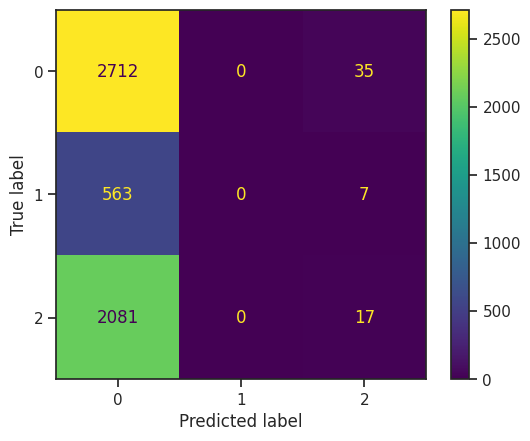

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test,y_pred, target_names = target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.99      0.67      2747
            Single-gene inheritance diseases       0.00      0.00      0.00       570
Multifactorial genetic inheritance disorders       0.29      0.01      0.02      2098

                                    accuracy                           0.50      5415
                                   macro avg       0.26      0.33      0.23      5415
                                weighted avg       0.37      0.50      0.35      5415



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier : This algorithm does not need data to be scaled.

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
# Fit the model on the trainng data.
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
results = cross_val_score(dtc,X_train,y_train, cv=5)
print(results)
print(np.mean(results))

[0.41115948 0.42461417 0.42319873 0.42992874 0.40459224]
0.4186986719204562


In [ ]:
#test score
dtc.score(X_test, y_test)

0.42253000923361034

In [ ]:
DTcm = confusion_matrix(y_test, y_pred_dtc)
DTcm

array([[1393,  319, 1035],
       [ 257,   92,  221],
       [1035,  260,  803]])

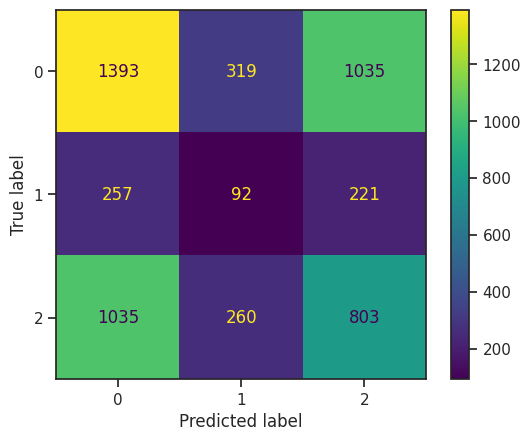

In [ ]:
cm_display = ConfusionMatrixDisplay(DTcm).plot()


In [ ]:
print(classification_report(y_test,y_pred_dtc, target_names = target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.52      0.51      0.51      2747
            Single-gene inheritance diseases       0.14      0.16      0.15       570
Multifactorial genetic inheritance disorders       0.39      0.38      0.39      2098

                                    accuracy                           0.42      5415
                                   macro avg       0.35      0.35      0.35      5415
                                weighted avg       0.43      0.42      0.43      5415



In [ ]:
acc_score = accuracy_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc, average='weighted')
print('DecisionTreeClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('DecisionTreeClassifier F1 : ', "%.2f" % (f1*100))

DecisionTreeClassifier Accuracy :  42.25
DecisionTreeClassifier F1 :  42.55


RandomForestClassifier : This algorithm does not need data to be scaled.

In [ ]:
#class_weight={1: 0.15, 2:0.5, 3: 1.5},random_state=42,verbose=False
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [ ]:
results = cross_val_score(rfc,X_train,y_train, cv=5)
print(results)
print(np.mean(results))

[0.49267907 0.48674317 0.49287411 0.49643705 0.48733175]
0.49121303070151934


In [ ]:
#test score
rfc.score(X_test, y_test)

0.4871652816251154

In [ ]:
RFcm = confusion_matrix(y_test, y_pred_rfc)
RFcm

array([[2297,    0,  450],
       [ 487,    2,   81],
       [1759,    0,  339]])

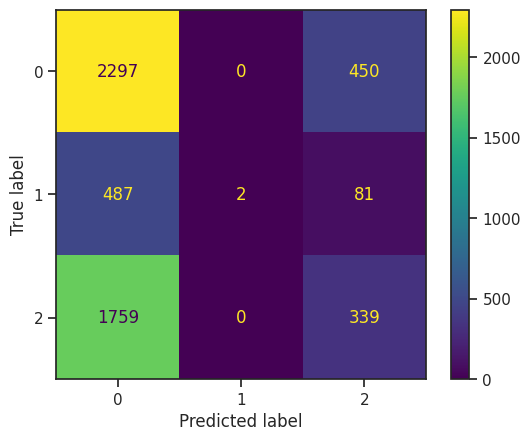

In [ ]:
cm_display = ConfusionMatrixDisplay(RFcm).plot()

In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.51      0.84      0.63      2747
           1       1.00      0.00      0.01       570
           2       0.39      0.16      0.23      2098

    accuracy                           0.49      5415
   macro avg       0.63      0.33      0.29      5415
weighted avg       0.51      0.49      0.41      5415



In [ ]:
acc_score = accuracy_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc, average='weighted')
print('RandomForestClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('RandomForestClassifier F1 : ', "%.2f" % (f1*100))

RandomForestClassifier Accuracy :  48.72
RandomForestClassifier F1 :  40.89


KNeighborsClassifier KNN : This algorithm Need Scaled data.

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming 'imputer' was previously defined and fitted on the training data
# Transform both training and test datasets to handle missing values
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

In [ ]:
print(test_scores)

[0.41902123730378577, 0.4481994459833795, 0.4424746075715605, 0.4500461680517082, 0.44986149584487534, 0.46371191135734074, 0.4587257617728532, 0.47054478301015695, 0.4662973222530009]


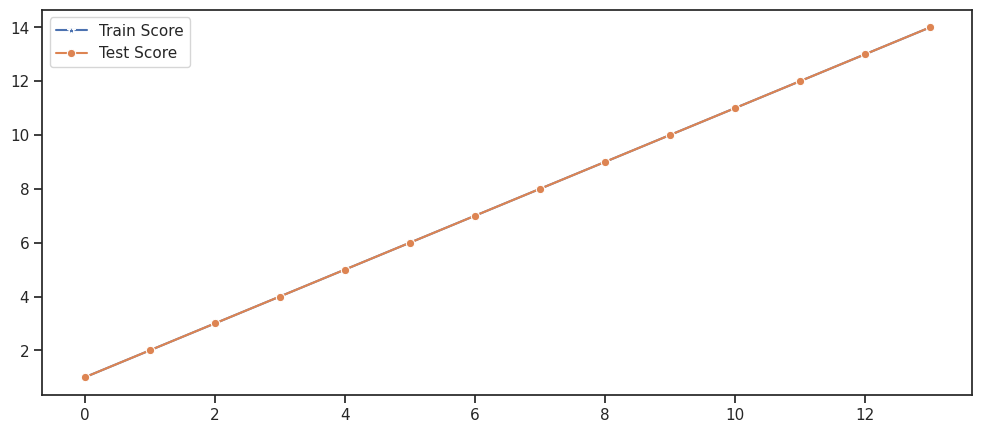

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(data=list(range(1,15)),marker='*',label='Train Score')
p = sns.lineplot(data=list(range(1,15)),marker='o',label='Test Score')

In [ ]:
knn = KNeighborsClassifier(2)
knn.fit(X_train_scaled,y_train)
#test score
knn.score(X_test_scaled,y_test)

0.4481994459833795

In [ ]:
#cv on training data only : still need discussion
results = cross_val_score(knn,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.46933122 0.47289276 0.46595408 0.4608076  0.46555819]
0.4669087708645285


In [ ]:
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
acc_score = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')
print('KNeighborsClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('KNeighborsClassifier F1 : ', "%.2f" % (f1*100))

KNeighborsClassifier Accuracy :  44.82
KNeighborsClassifier F1 :  39.73


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      2747
           1       0.13      0.11      0.12       570
           2       0.36      0.14      0.20      2098

    accuracy                           0.45      5415
   macro avg       0.33      0.33      0.31      5415
weighted avg       0.41      0.45      0.40      5415



support vector machine algorithm SVC : This algorithm Need Scaled data.

In [ ]:
#Radia basis Function
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=42)
rbf.fit(X_train_scaled, y_train)
#Polynomial
poly = svm.SVC(kernel='poly', degree=3, C=1, random_state=42)
poly.fit(X_train_scaled, y_train)

SVC(C=1, kernel='poly', random_state=42)

In [ ]:
results = cross_val_score(rbf,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.51404828 0.51404828 0.51425178 0.51425178 0.5138559 ]
0.5140912037563592


In [ ]:
results = cross_val_score(poly,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.47605857 0.50217649 0.47347585 0.49406176 0.4722882 ]
0.4836121745794665


In [ ]:
poly_pred = poly.predict(X_test_scaled)
rbf_pred = rbf.predict(X_test_scaled)

In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('SVM Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('SVM F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

SVM Accuracy (Polynomial Kernel):  48.25
SVM F1 (Polynomial Kernel):  43.09


In [ ]:
rbf_accuracy = accuracy_score(y_test, poly_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('SVM Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('SVM F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

SVM Accuracy (RBF Kernel):  48.25
SVM F1 (RBF Kernel):  34.15


In [ ]:
print(classification_report(y_test,poly_pred))

              precision    recall  f1-score   support

           0       0.51      0.76      0.61      2747
           1       0.13      0.01      0.02       570
           2       0.40      0.25      0.31      2098

    accuracy                           0.48      5415
   macro avg       0.35      0.34      0.31      5415
weighted avg       0.43      0.48      0.43      5415



In [ ]:
print(classification_report(y_test,rbf_pred, target_names=target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      1.00      0.67      2747
            Single-gene inheritance diseases       0.00      0.00      0.00       570
Multifactorial genetic inheritance disorders       0.00      0.00      0.00      2098

                                    accuracy                           0.51      5415
                                   macro avg       0.17      0.33      0.22      5415
                                weighted avg       0.26      0.51      0.34      5415



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Imbalance Data Handling

In [ ]:
pip install imblearn

Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE()

In [ ]:
X_train_sm, y_train_sm =  sm.fit_resample(X_train, y_train)

In [ ]:
# original counts :
y.value_counts()

Mitochondrial     9241
Single_gene       6929
Multifactorial    1877
Name: Genetic_Disorder, dtype: int64

In [ ]:
# counts after over_sampling
#y_train_sm.value_counts()
import numpy as np
unique, counts = np.unique(y_train_sm, return_counts=True)
dict(zip(unique, counts))

{0: 6494, 1: 6494, 2: 6494}

In [ ]:
final_model = RandomForestClassifier()
#final_model = lgb.LGBMClassifier()
final_model.fit(X_train_sm, y_train_sm)
y_pred_final = final_model.predict(X_test)

In [ ]:
#test score
final_model.score(X_test, y_test)

0.48107109879963067

In [ ]:
acc_score = accuracy_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final, average='weighted')
print('SMOTE Accuracy : ', "%.2f" % (acc_score*100))
print('SMOTE F1 : ', "%.2f" % (f1*100))

SMOTE Accuracy :  48.11
SMOTE F1 :  42.73


In [ ]:
print(classification_report(y_test,y_pred_final, target_names=target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.77      0.61      2747
            Single-gene inheritance diseases       0.27      0.01      0.02       570
Multifactorial genetic inheritance disorders       0.39      0.24      0.29      2098

                                    accuracy                           0.48      5415
                                   macro avg       0.39      0.34      0.31      5415
                                weighted avg       0.44      0.48      0.43      5415



Using RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# counts after over_sampling
#y_train_ros.value_counts()
unique, counts = np.unique(y_train_ros, return_counts=True)
dict(zip(unique, counts))

{0: 6494, 1: 6494, 2: 6494}

In [ ]:
final_model2 = RandomForestClassifier()
final_model2.fit(X_train_ros, y_train_ros)
y_pred_final2 = final_model2.predict(X_test)
#test score
final_model2.score(X_test, y_test)

0.469067405355494

In [ ]:
acc_score = accuracy_score(y_test, y_pred_final2)
f1 = f1_score(y_test, y_pred_final2, average='weighted')
print('RandomOverSampler Accuracy : ', "%.2f" % (acc_score*100))
print('RandomOverSampler F1 : ', "%.2f" % (f1*100))

RandomOverSampler Accuracy :  46.91
RandomOverSampler F1 :  42.09


Using RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# counts after over_sampling
#y_train_ros.value_counts()
unique, counts = np.unique(y_train_rus, return_counts=True)
dict(zip(unique, counts))

{0: 1307, 1: 1307, 2: 1307}

In [ ]:
final_model3 = RandomForestClassifier()
final_model3.fit(X_train_rus, y_train_rus)
y_pred_final3 = final_model3.predict(X_test)
#test score
final_model3.score(X_test, y_test)

0.34533702677746997

In [ ]:
acc_score = accuracy_score(y_test, y_pred_final3)
f1 = f1_score(y_test, y_pred_final3, average='weighted')
print('RandomUnderSampler Accuracy : ', "%.2f" % (acc_score*100))
print ('RandomUnderSampler F1 : ', "%.2f" % (f1*100))

RandomUnderSampler Accuracy :  34.53
RandomUnderSampler F1 :  36.75


Using class_weight

In [ ]:
final_model4 = RandomForestClassifier(random_state=42, class_weight ='balanced')
final_model4.fit(X_train_sm, y_train_sm)
y_pred_final4 = final_model4.predict(X_test)
#test score
final_model4.score(X_test, y_test)

0.48162511542012926

In [ ]:
acc_score = accuracy_score(y_test, y_pred_final4)
f1 = f1_score(y_test, y_pred_final4, average='weighted')
print('Random Forest classifier with class_weight and SMOTE Accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier with class_weight and SMOTE  F1 : ', "%.2f" % (f1*100))

Random Forest classifier with class_weight and SMOTE Accuracy :  48.16
Random Forest classifier with class_weight and SMOTE  F1 :  42.32


In [ ]:
print(classification_report(y_test,y_pred_final4, target_names=target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.78      0.62      2747
            Single-gene inheritance diseases       0.11      0.00      0.01       570
Multifactorial genetic inheritance disorders       0.39      0.22      0.28      2098

                                    accuracy                           0.48      5415
                                   macro avg       0.33      0.33      0.30      5415
                                weighted avg       0.42      0.48      0.42      5415



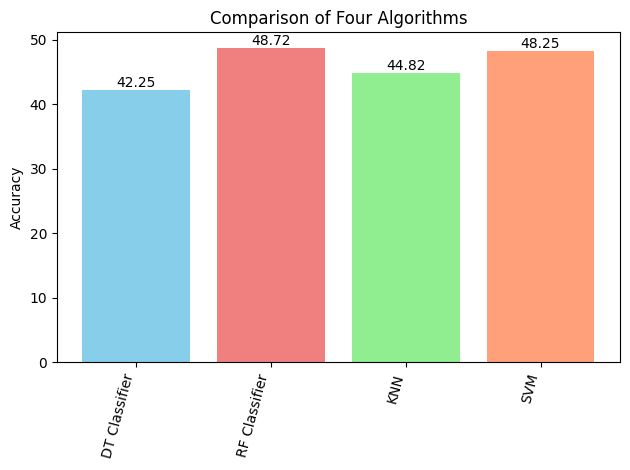

In [ ]:
import matplotlib.pyplot as plt

# Given accuracy values for four algorithms
accuracy_values = [42.25, 48.72, 44.82, 48.25]

# Labels for the algorithms
algorithm_labels = ['DT Classifier', 'RF Classifier', 'KNN', 'SVM']

# Plotting the comparison
fig, ax = plt.subplots()
ax.bar(algorithm_labels, accuracy_values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon',])
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Four Algorithms')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(rotation=75, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

comparison of F1 Score

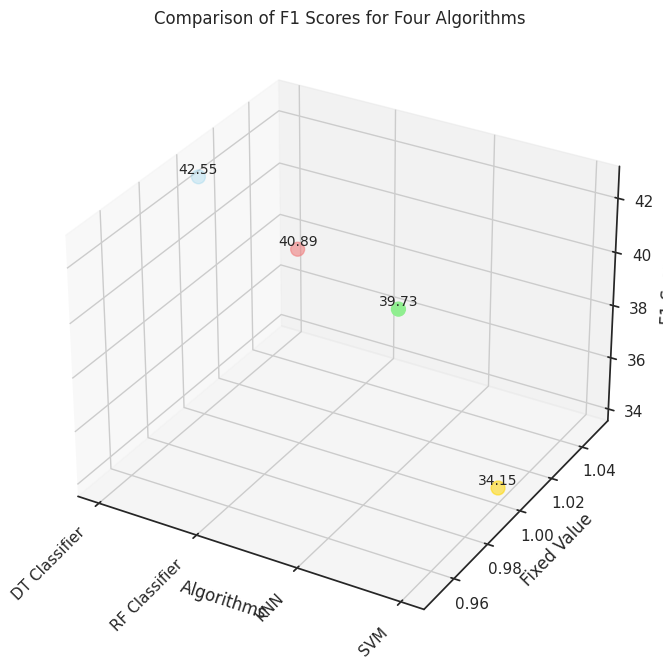

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given F1 scores for six algorithms
f1_scores_algorithm1 = 42.55
f1_scores_algorithm2 = 40.89
f1_scores_algorithm3 = 39.73
f1_scores_algorithm4 = 34.15
# Labels for the algorithms
algorithm_labels = ['DT Classifier', 'RF Classifier', 'KNN', 'SVM']

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(range(len(algorithm_labels)), [1]*len(algorithm_labels), [f1_scores_algorithm1, f1_scores_algorithm2,
                                                                     f1_scores_algorithm3, f1_scores_algorithm4,],
           color=['skyblue', 'lightcoral', 'lightgreen', 'gold'], s=100, marker='o')

# Setting labels
ax.set_xticks(range(len(algorithm_labels)))
ax.set_xticklabels(algorithm_labels, rotation=45, ha='right')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Fixed Value')
ax.set_zlabel('F1 Score')

# Display the F1 scores on top of the markers
for i, txt in enumerate([f1_scores_algorithm1, f1_scores_algorithm2, f1_scores_algorithm3,
                         f1_scores_algorithm4]):
    ax.text(i, 1, txt, fontsize=10, ha='center', va='bottom',s=txt)

plt.title('Comparison of F1 Scores for Four Algorithms')
plt.show()


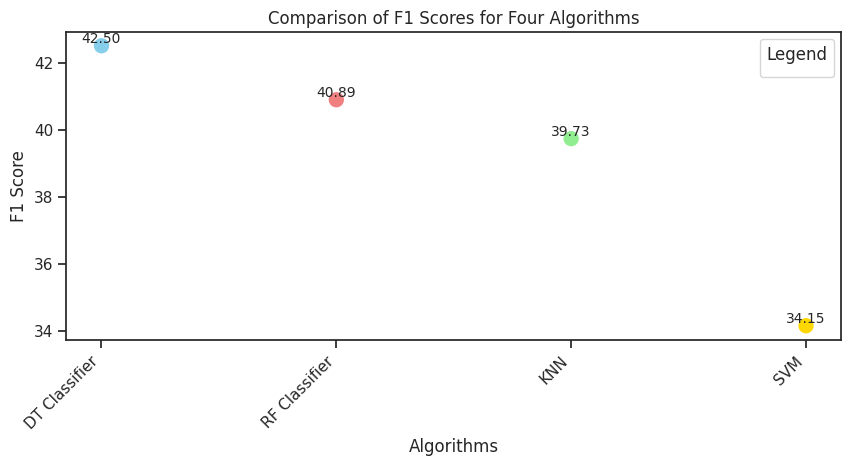

In [ ]:
import matplotlib.pyplot as plt

# Given F1 scores for six algorithms
f1_scores = [42.5, 40.89, 39.73, 34.15]

# Labels for the algorithms
algorithm_labels = ['DT Classifier', 'RF Classifier', 'KNN', 'SVM']

# Creating a scatter plot
fig, ax = plt.subplots(figsize=(10, 4))

# Scatter plot
scatter = ax.scatter(range(len(algorithm_labels)), f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'], s=100, marker='o')

# Setting labels
ax.set_xticks(range(len(algorithm_labels)))
ax.set_xticklabels(algorithm_labels, rotation=45, ha='right')
ax.set_xlabel('Algorithms')
ax.set_ylabel('F1 Score')

# Display the F1 scores on top of the markers
for i, txt in enumerate(f1_scores):
    ax.text(i, txt, f'{txt:.2f}', fontsize=10, ha='center', va='bottom')

# Adding a legend
ax.legend(scatter.legend_elements()[0], ['Algorithm'], title='Legend')

plt.title('Comparison of F1 Scores for Four Algorithms')
plt.show()


<ipython-input-141-a56d83e5240b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=algorithm_labels, y=f1_scores, ax=ax, palette='pastel')


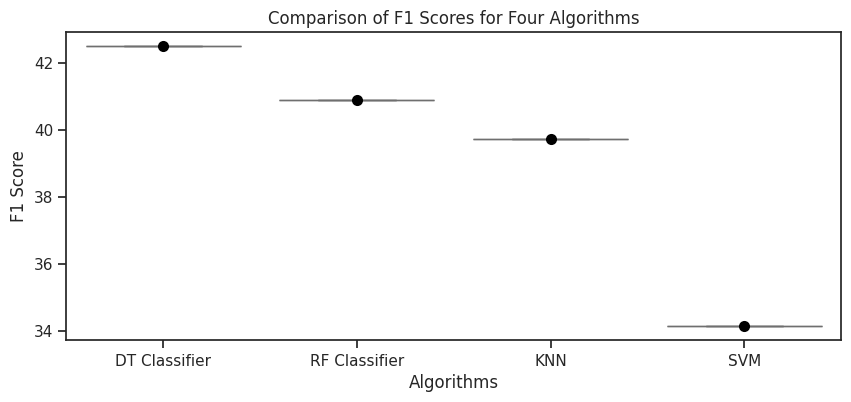

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Given F1 scores for six algorithms
f1_scores = [42.5, 40.89, 39.73, 34.15]

# Labels for the algorithms
algorithm_labels = ['DT Classifier', 'RF Classifier', 'KNN', 'SVM']

# Creating a box plot
fig, ax = plt.subplots(figsize=(10, 4))

# Box plot
sns.boxplot(x=algorithm_labels, y=f1_scores, ax=ax, palette='pastel')

# Adding data points on top of the boxes
sns.swarmplot(x=algorithm_labels, y=f1_scores, color='black', size=8, ax=ax)

# Setting labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Four Algorithms')

plt.show()


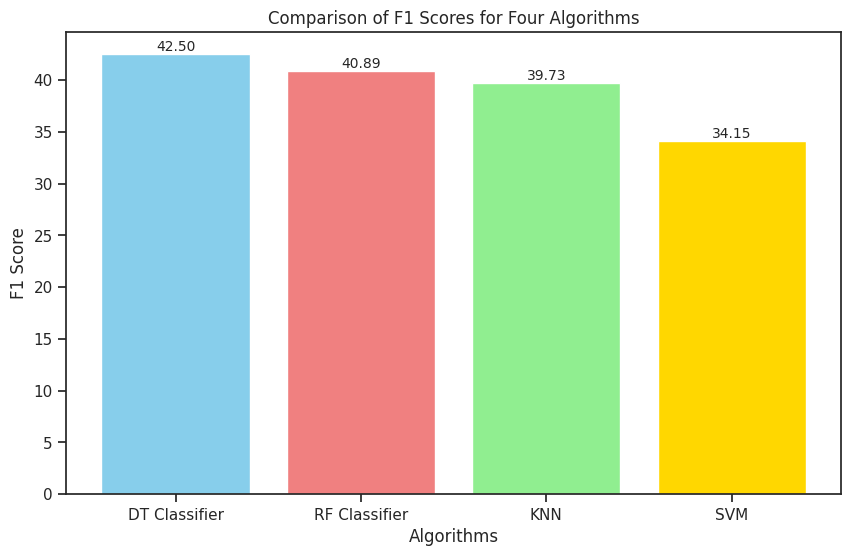

In [ ]:
import matplotlib.pyplot as plt

# Given F1 scores for four algorithms
f1_scores = [42.5, 40.89, 39.73, 34.15]

# Labels for the algorithms
algorithm_labels = ['DT Classifier', 'RF Classifier', 'KNN', 'SVM']

# Creating a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
ax.bar(algorithm_labels, f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Adding data values on top of the bars
for i, v in enumerate(f1_scores):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Setting labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Four Algorithms')

plt.show()
